# 重力と重力エネルギー - 問題解説
## Gravity and Gravitational Energy - Problem Solutions

### section2.pdf の問2.1から順に視覚的解説

このNotebookでは、重力と重力エネルギーに関する問題を視覚的に解説します。

### 学習目標 / Learning Objectives
- 重力の法則と計算方法を理解する
- 重力エネルギーと位置エネルギーの概念を把握する
- 天体力学の基礎を学ぶ
- 重力の様々な応用を理解する

In [51]:
!pip install \
    numpy \
    matplotlib \
    seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [52]:
#!/usr/bin/env python3
"""
Section 2: Gravity and Gravitational Energy Problems
第2章: 重力と重力エネルギーの問題解説

Visual explanations of gravitational physics problems from section2.pdf
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
import seaborn as sns
import japanize_matplotlib

# フォント設定（マイナス記号の文字化け防止）
plt.rcParams['font.family'] = ['IPAexGothic', 'DejaVu Sans']
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

# Set style for better plots
plt.style.use('seaborn-v0_8')
rcParams['figure.figsize'] = (12, 8)
rcParams['font.size'] = 10

# Physical constants and astronomical data
G = 6.67e-11      # N⋅m²/kg² (gravitational constant)
M_earth = 5.97e24 # kg (Earth mass)
M_sun = 1.99e30   # kg (Sun mass)
M_moon = 7.36e22  # kg (Moon mass)
R_earth = 6.4e6   # m (Earth radius)
r_earth_sun = 1.50e11  # m (Earth-Sun distance)
r_earth_moon = 3.84e8  # m (Earth-Moon distance)
g = 9.8           # m/s² (surface gravity)

print("=" * 60)
print("重力と重力エネルギー - 問題解説")
print("Gravity and Gravitational Energy - Problem Solutions")
print("=" * 60)
print()

print("物理定数と天体データ / Physical Constants and Astronomical Data:")
print(f"重力定数 / Gravitational constant (G): {G:.2e} N⋅m²/kg²")
print(f"地球質量 / Earth mass (M⊕): {M_earth:.2e} kg")
print(f"太陽質量 / Sun mass (M☉): {M_sun:.2e} kg")
print(f"月質量 / Moon mass (Mm): {M_moon:.2e} kg")
print(f"地球半径 / Earth radius (R⊕): {R_earth:.1e} m")
print(f"地球-太陽距離 / Earth-Sun distance: {r_earth_sun:.2e} m")
print(f"地球-月距離 / Earth-Moon distance: {r_earth_moon:.2e} m")
print(f"重力加速度 / Surface gravity (g): {g} m/s²")
print()

重力と重力エネルギー - 問題解説
Gravity and Gravitational Energy - Problem Solutions

物理定数と天体データ / Physical Constants and Astronomical Data:
重力定数 / Gravitational constant (G): 6.67e-11 N⋅m²/kg²
地球質量 / Earth mass (M⊕): 5.97e+24 kg
太陽質量 / Sun mass (M☉): 1.99e+30 kg
月質量 / Moon mass (Mm): 7.36e+22 kg
地球半径 / Earth radius (R⊕): 6.4e+06 m
地球-太陽距離 / Earth-Sun distance: 1.50e+11 m
地球-月距離 / Earth-Moon distance: 3.84e+08 m
重力加速度 / Surface gravity (g): 9.8 m/s²



## 問2.1: 太陽と月の重力の比較
### Problem 2.1: Comparison of Solar and Lunar Gravitational Forces

**問題**: 地球に働く太陽と月の重力の大きさの比を求めよ。また、月が地球の軌道上にあるとき、月に働く太陽と地球の重力の比も求めよ。

**重力の公式**: $F = \frac{GM_1M_2}{r^2}$

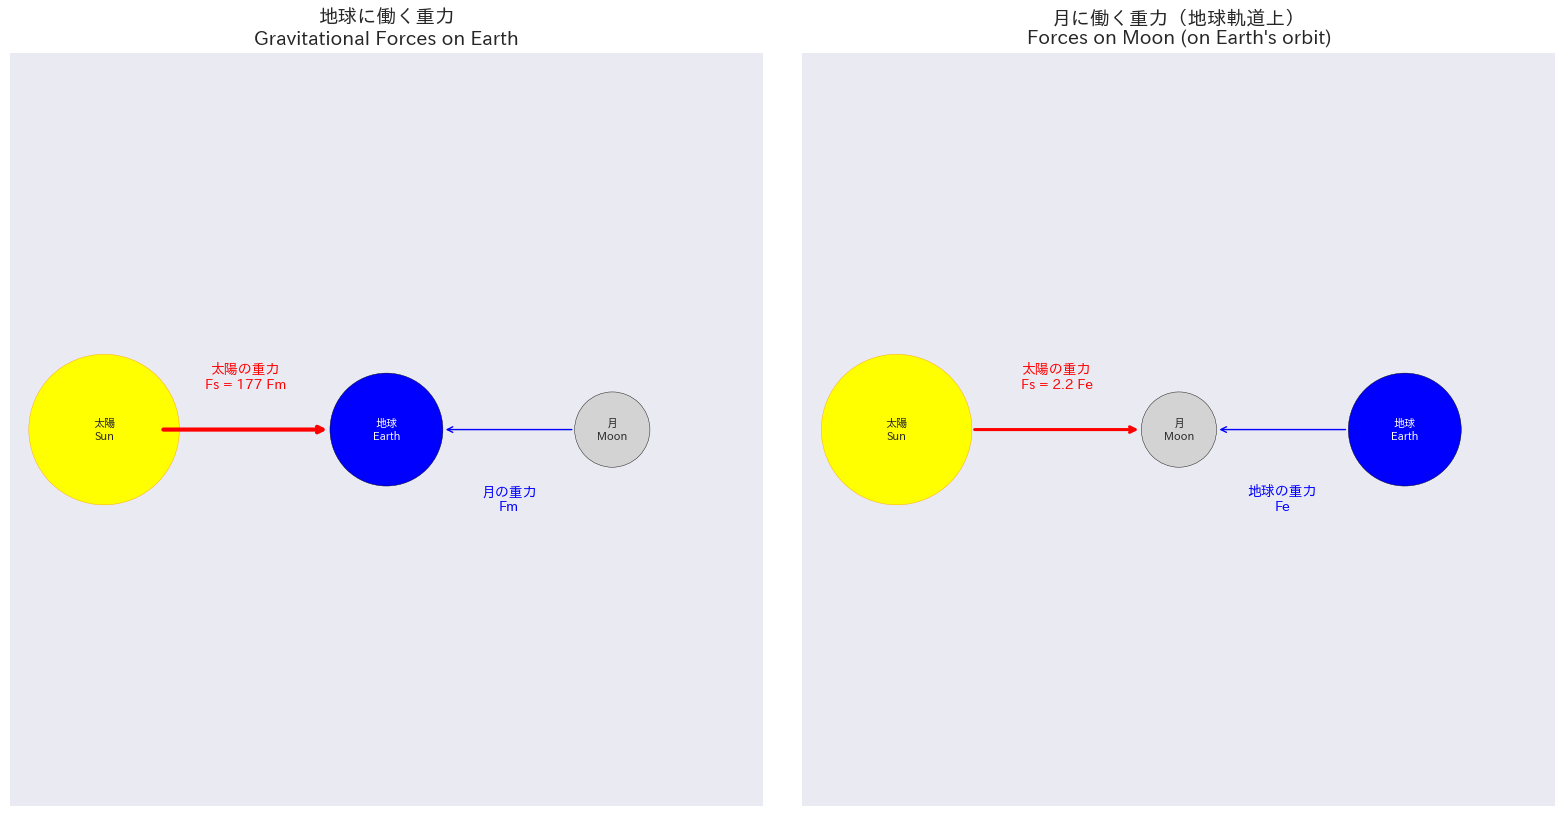

🌟 詳細解説：太陽と月の重力比較
🌟 Detailed Explanation: Solar vs Lunar Gravitational Forces

📖 背景と目的 / Background and Purpose:
この問題は、地球-月-太陽系における重力の相互作用を理解するためのものです。
万有引力の法則 F = GMm/r² を実際の天体系に適用し、
質量と距離の効果を定量的に比較します。
This problem helps understand gravitational interactions in the Earth-Moon-Sun system.
We apply Newton's law of gravitation F = GMm/r² to real celestial bodies,
quantitatively comparing the effects of mass and distance.

🎯 左の図：地球に働く重力の比較 / Left Figure: Forces Acting on Earth
──────────────────────────────────────────────────
図の構成要素 / Figure Components:
• 🌞 黄色い大きな円：太陽（質量 M☉ = 1.99×10³⁰ kg）
• 🌍 青い中央の円：地球（質量 M⊕ = 5.97×10²⁴ kg）
• 🌙 灰色の小さな円：月（質量 Mm = 7.36×10²² kg）
• ➡️ 赤い太い矢印：太陽からの重力（Fs）
• ➡️ 青い細い矢印：月からの重力（Fm）

力の大きさの比較 / Force Magnitude Comparison:
• 太陽の重力/月の重力 = 177
• これは質量比（M☉/Mm ≈ 27）と距離比の二乗（(rm/rs)² ≈ 6.5）の積
• 矢印の太さが力の大きさを視覚的に表現
• Solar force/Lunar force = 177
• This is the product of mass ratio (~27) and distance ratio squared (~6.5)
• Arrow thickness visually represents force magnitud

In [53]:
def visualize_problem_2_1():
    """Visualize gravitational force comparisons"""
    
    # 日本語フォント設定
    plt.rcParams['font.family'] = ['IPAexGothic', 'DejaVu Sans']
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['axes.unicode_minus'] = False
    
    # 計算結果を再取得
    ratio_masses = M_sun / M_moon
    ratio_distances_sq = (r_earth_moon / r_earth_sun)**2
    ratio_earth_forces = ratio_masses * ratio_distances_sq
    
    ratio_masses_moon = M_sun / M_earth
    ratio_moon_forces = ratio_masses_moon * ratio_distances_sq
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left plot: Forces on Earth
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.set_aspect('equal')
    
    # Draw Earth at center
    earth = patches.Circle((0, 0), 0.3, facecolor='blue', edgecolor='black')
    ax1.add_patch(earth)
    ax1.text(0, 0, '地球\nEarth', ha='center', va='center', fontsize=8, color='white', fontweight='bold')
    
    # Draw Sun (left)
    sun = patches.Circle((-1.5, 0), 0.4, facecolor='yellow', edgecolor='orange')
    ax1.add_patch(sun)
    ax1.text(-1.5, 0, '太陽\nSun', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Draw Moon (right)
    moon = patches.Circle((1.2, 0), 0.2, facecolor='lightgray', edgecolor='black')
    ax1.add_patch(moon)
    ax1.text(1.2, 0, '月\nMoon', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Draw force arrows
    ax1.annotate('', xy=(-0.3, 0), xytext=(-1.2, 0),
                arrowprops=dict(arrowstyle='->', lw=3, color='red'))
    ax1.text(-0.75, 0.2, f'太陽の重力\nFs = {ratio_earth_forces:.0f} Fm', ha='center', va='bottom', 
             fontsize=10, color='red', fontweight='bold')
    
    ax1.annotate('', xy=(0.3, 0), xytext=(1.0, 0),
                arrowprops=dict(arrowstyle='->', lw=1, color='blue'))
    ax1.text(0.65, -0.3, '月の重力\nFm', ha='center', va='top', 
             fontsize=10, color='blue', fontweight='bold')
    
    ax1.set_title('地球に働く重力\nGravitational Forces on Earth', fontsize=14, fontweight='bold')
    ax1.set_xticks([])
    ax1.set_yticks([])
    for spine in ax1.spines.values():
        spine.set_visible(False)
    
    # Right plot: Forces on Moon (when on Earth's orbit)
    ax2.set_xlim(-2, 2)
    ax2.set_ylim(-2, 2)
    ax2.set_aspect('equal')
    
    # Draw Sun at center-left
    sun2 = patches.Circle((-1.5, 0), 0.4, facecolor='yellow', edgecolor='orange')
    ax2.add_patch(sun2)
    ax2.text(-1.5, 0, '太陽\nSun', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Draw Moon on Earth's orbit
    moon2 = patches.Circle((0, 0), 0.2, facecolor='lightgray', edgecolor='black')
    ax2.add_patch(moon2)
    ax2.text(0, 0, '月\nMoon', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Draw Earth (right)
    earth2 = patches.Circle((1.2, 0), 0.3, facecolor='blue', edgecolor='black')
    ax2.add_patch(earth2)
    ax2.text(1.2, 0, '地球\nEarth', ha='center', va='center', fontsize=8, color='white', fontweight='bold')
    
    # Draw force arrows
    ax2.annotate('', xy=(-0.2, 0), xytext=(-1.1, 0),
                arrowprops=dict(arrowstyle='->', lw=2.2, color='red'))
    ax2.text(-0.65, 0.2, f'太陽の重力\nFs = {ratio_moon_forces:.1f} Fe', ha='center', va='bottom', 
             fontsize=10, color='red', fontweight='bold')
    
    ax2.annotate('', xy=(0.2, 0), xytext=(0.9, 0),
                arrowprops=dict(arrowstyle='->', lw=1, color='blue'))
    ax2.text(0.55, -0.3, '地球の重力\nFe', ha='center', va='top', 
             fontsize=10, color='blue', fontweight='bold')
    
    ax2.set_title('月に働く重力（地球軌道上）\nForces on Moon (on Earth\'s orbit)', fontsize=14, fontweight='bold')
    ax2.set_xticks([])
    ax2.set_yticks([])
    for spine in ax2.spines.values():
        spine.set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 詳細な図の解説を出力
    print("=" * 80)
    print("🌟 詳細解説：太陽と月の重力比較")
    print("🌟 Detailed Explanation: Solar vs Lunar Gravitational Forces")
    print("=" * 80)
    print()
    
    print("📖 背景と目的 / Background and Purpose:")
    print("この問題は、地球-月-太陽系における重力の相互作用を理解するためのものです。")
    print("万有引力の法則 F = GMm/r² を実際の天体系に適用し、")
    print("質量と距離の効果を定量的に比較します。")
    print("This problem helps understand gravitational interactions in the Earth-Moon-Sun system.")
    print("We apply Newton's law of gravitation F = GMm/r² to real celestial bodies,")
    print("quantitatively comparing the effects of mass and distance.")
    print()
    
    print("🎯 左の図：地球に働く重力の比較 / Left Figure: Forces Acting on Earth")
    print("─" * 50)
    print("図の構成要素 / Figure Components:")
    print("• 🌞 黄色い大きな円：太陽（質量 M☉ = 1.99×10³⁰ kg）")
    print("• 🌍 青い中央の円：地球（質量 M⊕ = 5.97×10²⁴ kg）")
    print("• 🌙 灰色の小さな円：月（質量 Mm = 7.36×10²² kg）")
    print("• ➡️ 赤い太い矢印：太陽からの重力（Fs）")
    print("• ➡️ 青い細い矢印：月からの重力（Fm）")
    print()
    print("力の大きさの比較 / Force Magnitude Comparison:")
    print(f"• 太陽の重力/月の重力 = {ratio_earth_forces:.0f}")
    print("• これは質量比（M☉/Mm ≈ 27）と距離比の二乗（(rm/rs)² ≈ 6.5）の積")
    print("• 矢印の太さが力の大きさを視覚的に表現")
    print(f"• Solar force/Lunar force = {ratio_earth_forces:.0f}")
    print("• This is the product of mass ratio (~27) and distance ratio squared (~6.5)")
    print("• Arrow thickness visually represents force magnitude")
    print()
    
    print("🎯 右の図：月に働く重力の比較 / Right Figure: Forces Acting on Moon")
    print("─" * 50)
    print("特殊な条件 / Special Condition:")
    print("• 月が地球の軌道上にあると仮定（思考実験）")
    print("• 月と太陽の距離 = 地球と太陽の距離 = 1.5×10¹¹ m")
    print("• Assumes Moon is on Earth's orbit (thought experiment)")
    print("• Moon-Sun distance = Earth-Sun distance = 1.5×10¹¹ m")
    print()
    print("結果の解釈 / Result Interpretation:")
    print(f"• 太陽の重力が地球の重力の{ratio_moon_forces:.1f}倍")
    print("• これが月の軌道に影響を与える要因")
    print("• 潮汐力の起源を理解する手がかり")
    print(f"• Solar gravity is {ratio_moon_forces:.1f} times stronger than Earth's gravity")
    print("• This factor influences lunar orbital dynamics")
    print("• Key to understanding tidal force origins")
    print()
    
    print("🔬 物理学的洞察 / Physical Insights:")
    print("─" * 30)
    print("1. 距離の逆二乗則の威力:")
    print("   月は太陽より400倍近いが、太陽の重力が勝る")
    print("   Power of inverse square law:")
    print("   Moon is 400 times closer, but Sun's gravity dominates")
    print()
    print("2. 質量の重要性:")
    print("   太陽の巨大な質量（地球の33万倍）が決定的要因")
    print("   Importance of mass:")
    print("   Sun's enormous mass (330,000 times Earth's) is decisive")
    print()
    print("3. 天体力学への応用:")
    print("   惑星の軌道、潮汐現象、ラグランジュ点の理解に重要")
    print("   Applications to celestial mechanics:")
    print("   Crucial for planetary orbits, tides, Lagrange points")
    print()
    
    print("📊 数値的な詳細 / Numerical Details:")
    print("─" * 30)
    print("計算に使用した値 / Values used in calculation:")
    print(f"• M☉ = {M_sun:.2e} kg")
    print(f"• M⊕ = {M_earth:.2e} kg") 
    print(f"• Mm = {M_moon:.2e} kg")
    print(f"• rs = {r_earth_sun:.2e} m")
    print(f"• rm = {r_earth_moon:.2e} m")
    print()
    print("重力比の計算過程 / Gravity ratio calculation:")
    print("Fs/Fm = (M☉/Mm) × (rm/rs)²")
    print(f"      = {M_sun/M_moon:.1f} × {(r_earth_moon/r_earth_sun)**2:.2e}")
    print(f"      = {ratio_earth_forces:.0f}")
    print()
    
    return fig

fig1 = visualize_problem_2_1()

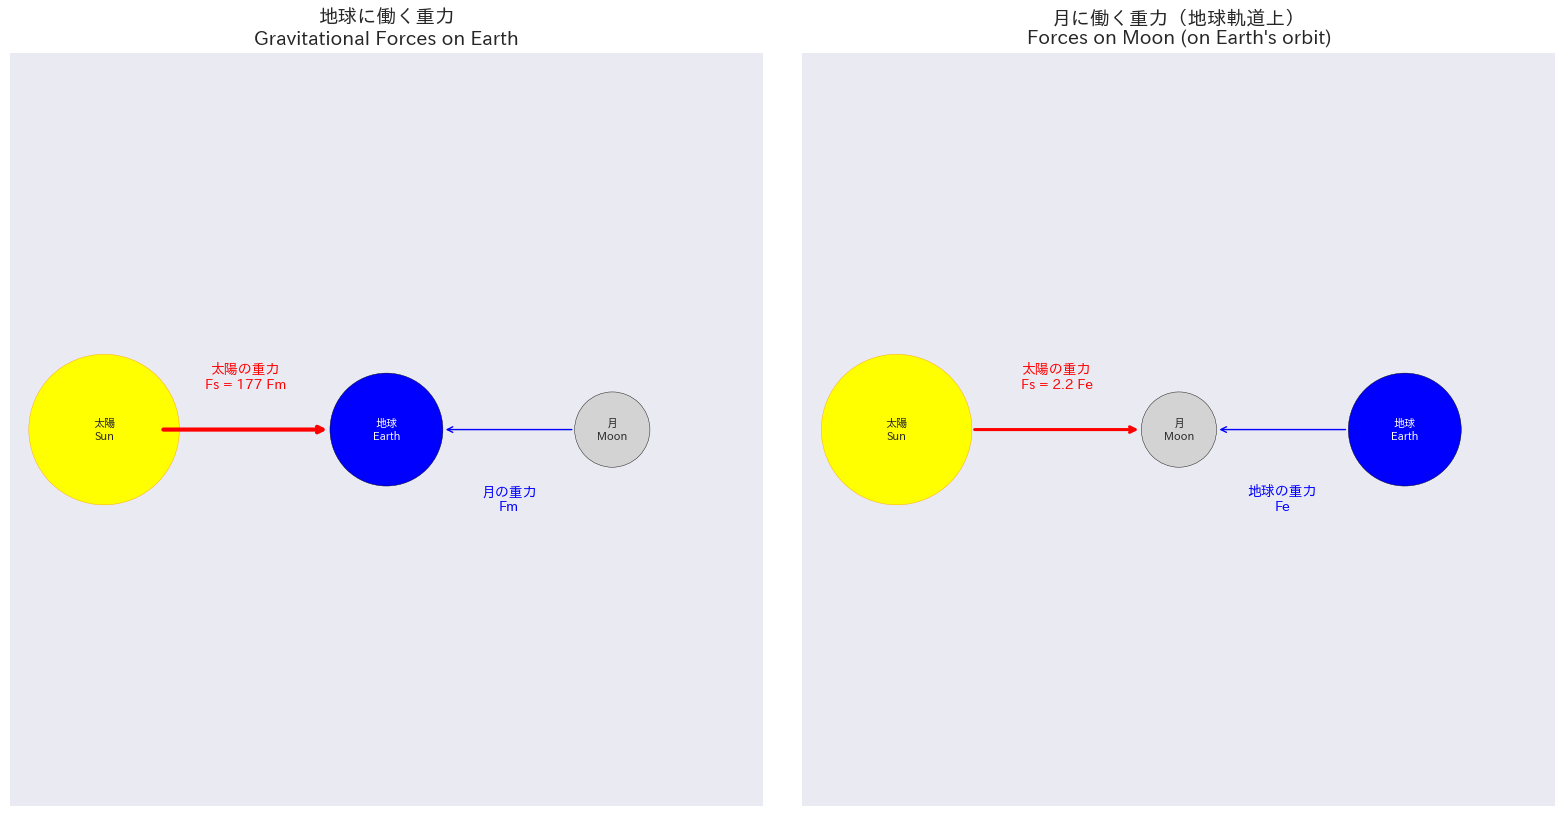

In [54]:
plt.rcParams['font.family'] = ['IPAexGothic', 'DejaVu Sans']
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.unicode_minus'] = False  # マイナス記号の文字化け防止

def visualize_problem_2_1():
    """Visualize gravitational force comparisons"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left plot: Forces on Earth
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.set_aspect('equal')
    
    # Draw Earth at center
    earth = patches.Circle((0, 0), 0.3, facecolor='blue', edgecolor='black')
    ax1.add_patch(earth)
    ax1.text(0, 0, '地球\nEarth', ha='center', va='center', fontsize=8, color='white', fontweight='bold')
    
    # Draw Sun (left)
    sun = patches.Circle((-1.5, 0), 0.4, facecolor='yellow', edgecolor='orange')
    ax1.add_patch(sun)
    ax1.text(-1.5, 0, '太陽\nSun', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Draw Moon (right)
    moon = patches.Circle((1.2, 0), 0.2, facecolor='lightgray', edgecolor='black')
    ax1.add_patch(moon)
    ax1.text(1.2, 0, '月\nMoon', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Draw force arrows
    ax1.annotate('', xy=(-0.3, 0), xytext=(-1.2, 0),
                arrowprops=dict(arrowstyle='->', lw=3, color='red'))
    ax1.text(-0.75, 0.2, f'太陽の重力\nFs = 177 Fm', ha='center', va='bottom', 
             fontsize=10, color='red', fontweight='bold')
    
    ax1.annotate('', xy=(0.3, 0), xytext=(1.0, 0),
                arrowprops=dict(arrowstyle='->', lw=1, color='blue'))
    ax1.text(0.65, -0.3, '月の重力\nFm', ha='center', va='top', 
             fontsize=10, color='blue', fontweight='bold')
    
    ax1.set_title('地球に働く重力\nGravitational Forces on Earth', fontsize=14, fontweight='bold')
    ax1.set_xticks([])
    ax1.set_yticks([])
    for spine in ax1.spines.values():
        spine.set_visible(False)
    
    # Right plot: Forces on Moon (when on Earth's orbit)
    ax2.set_xlim(-2, 2)
    ax2.set_ylim(-2, 2)
    ax2.set_aspect('equal')
    
    # Draw Sun at center-left
    sun2 = patches.Circle((-1.5, 0), 0.4, facecolor='yellow', edgecolor='orange')
    ax2.add_patch(sun2)
    ax2.text(-1.5, 0, '太陽\nSun', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Draw Moon on Earth's orbit
    moon2 = patches.Circle((0, 0), 0.2, facecolor='lightgray', edgecolor='black')
    ax2.add_patch(moon2)
    ax2.text(0, 0, '月\nMoon', ha='center', va='center', fontsize=8, fontweight='bold')
    
    # Draw Earth (right)
    earth2 = patches.Circle((1.2, 0), 0.3, facecolor='blue', edgecolor='black')
    ax2.add_patch(earth2)
    ax2.text(1.2, 0, '地球\nEarth', ha='center', va='center', fontsize=8, color='white', fontweight='bold')
    
    # Draw force arrows
    ax2.annotate('', xy=(-0.2, 0), xytext=(-1.1, 0),
                arrowprops=dict(arrowstyle='->', lw=2.2, color='red'))
    ax2.text(-0.65, 0.2, f'太陽の重力\nFs = 2.2 Fe', ha='center', va='bottom', 
             fontsize=10, color='red', fontweight='bold')
    
    ax2.annotate('', xy=(0.2, 0), xytext=(0.9, 0),
                arrowprops=dict(arrowstyle='->', lw=1, color='blue'))
    ax2.text(0.55, -0.3, '地球の重力\nFe', ha='center', va='top', 
             fontsize=10, color='blue', fontweight='bold')
    
    ax2.set_title('月に働く重力（地球軌道上）\nForces on Moon (on Earth\'s orbit)', fontsize=14, fontweight='bold')
    ax2.set_xticks([])
    ax2.set_yticks([])
    for spine in ax2.spines.values():
        spine.set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    return fig

fig1 = visualize_problem_2_1()

## 問2.2: 人間同士の重力
### Problem 2.2: Gravitational Force Between Humans

**問題**: 体重が60kgと40kgの恋人2人が50cmの距離にいるとき、2人の間に働く重力を求めよ。また、この力と同じ大きさの地球の重力が働く物体の質量はどれくらいか？

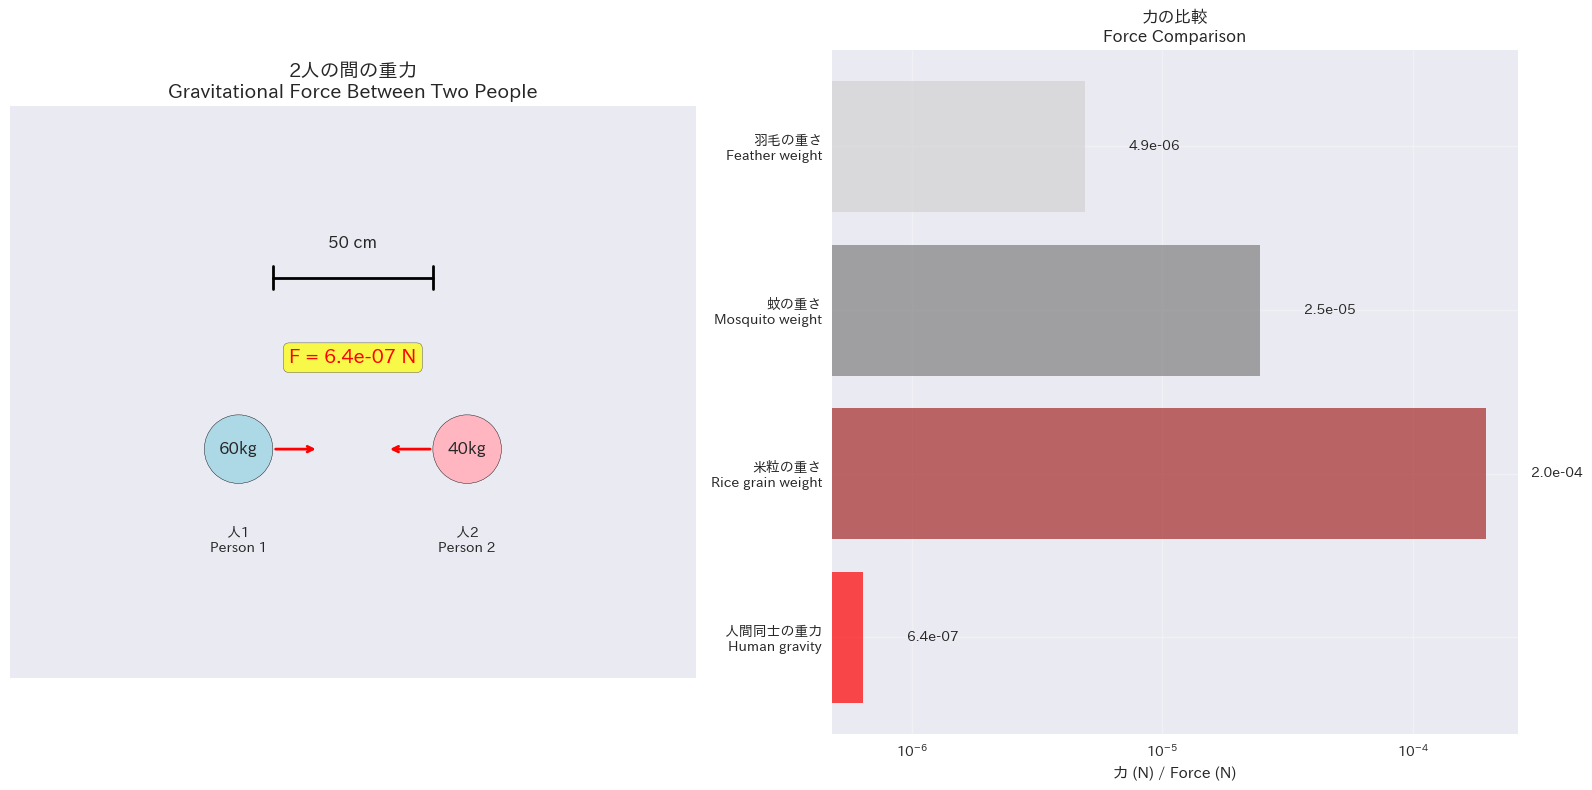

💕 詳細解説：人間同士の重力
💕 Detailed Explanation: Gravitational Force Between Humans

📖 問題の背景と意義 / Background and Significance:
この問題は重力の普遍性を示す興味深い例です。
万有引力の法則は、天体だけでなく日常の物体にも働きますが、
その効果は通常感じることができないほど小さいものです。
This problem demonstrates the universality of gravity.
Newton's law applies to everyday objects as well as celestial bodies,
but the effect is usually imperceptibly small.

🔢 計算の詳細 / Detailed Calculation:
────────────────────────────────────────
使用した公式 / Formula used:
F = G × m₁ × m₂ / r²

与えられた値 / Given values:
• 人1の質量 / Mass 1: m₁ = 60 kg
• 人2の質量 / Mass 2: m₂ = 40 kg
• 距離 / Distance: r = 0.5 m (50 cm)
• 重力定数 / Gravitational constant: G = 6.67e-11 N⋅m²/kg²

計算過程 / Calculation steps:
F = 6.67e-11 × 60 × 40 / (0.5)²
F = 6.67e-11 × 2400 / 0.25
F = 6.67e-11 × 9600
F = 6.40e-07 N

🎯 左の図：重力の作用 / Left Figure: Gravitational Action
────────────────────────────────────────
図の要素の説明 / Figure Elements:
• 🔵 水色の円：60kgの人（やや大きめに描画）
• 🌸 ピンクの円：40kgの人（やや小さめに描画）
• 📏 黒い線：50cmの距離を示す測定線
• ➡️ 赤い矢印：お互いに働く重力（作用・反作用）


In [55]:
def visualize_problem_2_2():
    """Visualize human gravitational force"""
    
    # 日本語フォント設定
    plt.rcParams['font.family'] = ['IPAexGothic', 'DejaVu Sans']
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['axes.unicode_minus'] = False
    
    # 人間同士の重力計算
    m1 = 60  # kg
    m2 = 40  # kg
    r = 0.5  # m
    F_human = G * m1 * m2 / r**2  # 重力の計算
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left plot: Two people with gravitational force
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-2, 3)
    ax1.set_aspect('equal')
    
    # Draw people as simple figures
    # Person 1 (60kg)
    person1 = patches.Circle((-1, 0), 0.3, facecolor='lightblue', edgecolor='black')
    ax1.add_patch(person1)
    ax1.text(-1, 0, '60kg', ha='center', va='center', fontsize=12, fontweight='bold')
    ax1.text(-1, -0.8, '人1\nPerson 1', ha='center', va='center', fontsize=10)
    
    # Person 2 (40kg)
    person2 = patches.Circle((1, 0), 0.3, facecolor='lightpink', edgecolor='black')
    ax1.add_patch(person2)
    ax1.text(1, 0, '40kg', ha='center', va='center', fontsize=12, fontweight='bold')
    ax1.text(1, -0.8, '人2\nPerson 2', ha='center', va='center', fontsize=10)
    
    # Distance line
    ax1.plot([-0.7, 0.7], [1.5, 1.5], 'k-', linewidth=2)
    ax1.plot([-0.7, -0.7], [1.4, 1.6], 'k-', linewidth=2)
    ax1.plot([0.7, 0.7], [1.4, 1.6], 'k-', linewidth=2)
    ax1.text(0, 1.8, '50 cm', ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Force arrows
    ax1.annotate('', xy=(-0.3, 0), xytext=(-0.7, 0),
                arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    ax1.annotate('', xy=(0.3, 0), xytext=(0.7, 0),
                arrowprops=dict(arrowstyle='->', lw=2, color='red'))
    
    ax1.text(0, 0.8, f'F = {F_human:.1e} N', ha='center', va='center', 
             fontsize=14, fontweight='bold', color='red',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    ax1.set_title('2人の間の重力\nGravitational Force Between Two People', 
                  fontsize=14, fontweight='bold')
    ax1.set_xticks([])
    ax1.set_yticks([])
    for spine in ax1.spines.values():
        spine.set_visible(False)
    
    # Right plot: Force comparison
    forces = ['人間同士の重力\nHuman gravity', '米粒の重さ\nRice grain weight', 
              '蚊の重さ\nMosquito weight', '羽毛の重さ\nFeather weight']
    force_values = [F_human, 20e-6 * g, 2.5e-6 * g, 0.5e-6 * g]  # N
    
    colors = ['red', 'brown', 'gray', 'lightgray']
    
    bars = ax2.barh(forces, force_values, color=colors, alpha=0.7)
    ax2.set_xscale('log')
    ax2.set_xlabel('力 (N) / Force (N)')
    ax2.set_title('力の比較\nForce Comparison')
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, value in zip(bars, force_values):
        ax2.text(value * 1.5, bar.get_y() + bar.get_height()/2, 
                f'{value:.1e}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 詳細な図の解説を出力
    print("=" * 80)
    print("💕 詳細解説：人間同士の重力")
    print("💕 Detailed Explanation: Gravitational Force Between Humans")
    print("=" * 80)
    print()
    
    print("📖 問題の背景と意義 / Background and Significance:")
    print("この問題は重力の普遍性を示す興味深い例です。")
    print("万有引力の法則は、天体だけでなく日常の物体にも働きますが、")
    print("その効果は通常感じることができないほど小さいものです。")
    print("This problem demonstrates the universality of gravity.")
    print("Newton's law applies to everyday objects as well as celestial bodies,")
    print("but the effect is usually imperceptibly small.")
    print()
    
    print("🔢 計算の詳細 / Detailed Calculation:")
    print("─" * 40)
    print("使用した公式 / Formula used:")
    print("F = G × m₁ × m₂ / r²")
    print()
    print("与えられた値 / Given values:")
    print("• 人1の質量 / Mass 1: m₁ = 60 kg")
    print("• 人2の質量 / Mass 2: m₂ = 40 kg") 
    print("• 距離 / Distance: r = 0.5 m (50 cm)")
    print(f"• 重力定数 / Gravitational constant: G = {G:.2e} N⋅m²/kg²")
    print()
    print("計算過程 / Calculation steps:")
    print(f"F = {G:.2e} × 60 × 40 / (0.5)²")
    print(f"F = {G:.2e} × 2400 / 0.25")
    print(f"F = {G:.2e} × 9600")
    print(f"F = {F_human:.2e} N")
    print()
    
    print("🎯 左の図：重力の作用 / Left Figure: Gravitational Action")
    print("─" * 40)
    print("図の要素の説明 / Figure Elements:")
    print("• 🔵 水色の円：60kgの人（やや大きめに描画）")
    print("• 🌸 ピンクの円：40kgの人（やや小さめに描画）")
    print("• 📏 黒い線：50cmの距離を示す測定線")
    print("• ➡️ 赤い矢印：お互いに働く重力（作用・反作用）")
    print("• 🟡 黄色いボックス：計算された力の値")
    print()
    print("ニュートンの第3法則 / Newton's Third Law:")
    print("• 2人の間に働く力は大きさが等しく、方向が反対")
    print(f"• F₁₂ = -F₂₁ = {F_human:.1e} N")
    print("• Forces between two people are equal and opposite")
    print(f"• F₁₂ = -F₂₁ = {F_human:.1e} N")
    print()
    
    print("🎯 右の図：力の大きさの比較 / Right Figure: Force Magnitude Comparison")
    print("─" * 40)
    print("比較対象の詳細 / Comparison Details:")
    print(f"1. 👫 人間同士の重力：{F_human:.1e} N")
    print("   - 問題で計算した値")
    print("   - Calculated value from the problem")
    print()
    print("2. 🌾 米粒1個の重さ：約2.0×10⁻⁴ N")
    print("   - 米粒の質量 ≈ 20 mg = 2×10⁻⁵ kg")
    print("   - 重さ = mg = 2×10⁻⁵ × 9.8 ≈ 2×10⁻⁴ N")
    print("   - Rice grain mass ≈ 20 mg = 2×10⁻⁵ kg")
    print("   - Weight = mg = 2×10⁻⁵ × 9.8 ≈ 2×10⁻⁴ N")
    print()
    print("3. 🦟 蚊1匹の重さ：約2.5×10⁻⁵ N")
    print("   - 蚊の質量 ≈ 2.5 mg = 2.5×10⁻⁶ kg")
    print("   - Mosquito mass ≈ 2.5 mg = 2.5×10⁻⁶ kg")
    print()
    print("4. 🪶 羽毛の重さ：約5×10⁻⁶ N")
    print("   - 小さな羽毛の質量 ≈ 0.5 mg = 5×10⁻⁷ kg")
    print("   - Small feather mass ≈ 0.5 mg = 5×10⁻⁷ kg")
    print()
    
    print("📊 力の比較分析 / Force Comparison Analysis:")
    print("─" * 40)
    rice_grain_force = 20e-6 * g
    ratio_rice = rice_grain_force / F_human
    print(f"• 米粒の重さ ÷ 人間の重力 = {ratio_rice:.0f}")
    print(f"• 人間同士の重力は米粒の重さの約1/{ratio_rice:.0f}")
    print(f"• Rice grain weight ÷ Human gravity = {ratio_rice:.0f}")
    print(f"• Human gravity is about 1/{ratio_rice:.0f} of rice grain weight")
    print()
    
    mosquito_force = 2.5e-6 * g
    ratio_mosquito = mosquito_force / F_human
    print(f"• 蚊の重さ ÷ 人間の重力 = {ratio_mosquito:.0f}")
    print(f"• Mosquito weight ÷ Human gravity = {ratio_mosquito:.0f}")
    print()
    
    print("🔬 物理学的考察 / Physical Considerations:")
    print("─" * 40)
    print("1. なぜ感じられないのか？ / Why can't we feel it?")
    print("   • 力が極めて小さい（10⁻⁷ オーダー）")
    print("   • 他の力（摩擦、空気抵抗など）に隠される")
    print("   • 人間の感覚閾値を大幅に下回る")
    print("   • Force is extremely small (10⁻⁷ order)")
    print("   • Hidden by other forces (friction, air resistance)")
    print("   • Far below human sensory threshold")
    print()
    print("2. 重力の特徴 / Characteristics of gravity:")
    print("   • 質量に比例（重い物ほど強い引力）")
    print("   • 距離の二乗に反比例（遠いと急激に弱くなる）")
    print("   • 常に引力（反発はない）")
    print("   • Proportional to mass (heavier objects have stronger attraction)")
    print("   • Inversely proportional to distance squared")
    print("   • Always attractive (no repulsion)")
    print()
    print("3. なぜ宇宙で重要なのか？ / Why important in space?")
    print("   • 大きな質量では効果が累積")
    print("   • 他の力（電磁力）は正負で打ち消し合う")
    print("   • 長距離にわたって作用")
    print("   • Effects accumulate for large masses")
    print("   • Other forces (electromagnetic) cancel out")
    print("   • Acts over long distances")
    print()
    
    print("🌟 興味深い事実 / Interesting Facts:")
    print("─" * 30)
    print("• もし地球上のすべての人（約80億人）が手をつないで円を作ったら、")
    print("  その円の直径は約400万kmになり、月までの距離の10倍以上！")
    print("• キャベンディッシュの実験（1798年）で初めて重力定数Gが測定された")
    print("• 現在でもGは物理定数の中で最も精度の低いもの（相対誤差~10⁻⁵）")
    print("• If all people on Earth (~8 billion) held hands in a circle,")
    print("  the diameter would be ~4 million km, over 10 times the Moon's distance!")
    print("• Cavendish experiment (1798) first measured gravitational constant G")
    print("• G is still the least precisely known physical constant (relative error ~10⁻⁵)")
    print()
    
    return fig

fig2 = visualize_problem_2_2()

## 問2.3: 水素原子内の重力とクーロン力
### Problem 2.3: Gravitational vs Coulomb Force in Hydrogen Atom

**問題**: 水素原子内で陽子と電子間に働く重力とクーロン力の大きさを比較せよ。なぜ宇宙では重力が重要なのか考察せよ。

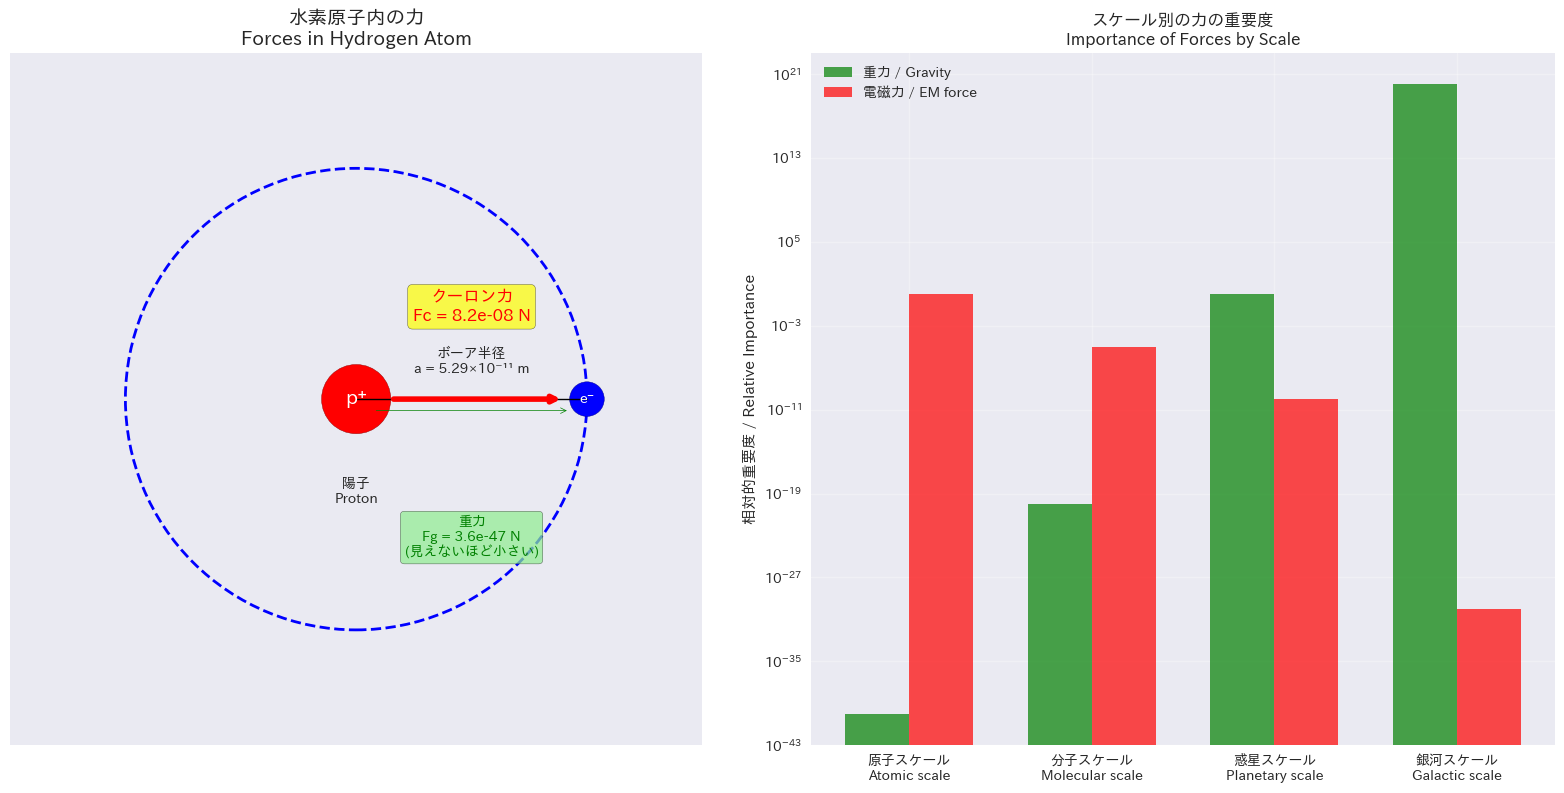

⚛️ 詳細解説：水素原子内の重力とクーロン力
⚛️ Detailed Explanation: Gravitational vs Coulomb Force in Hydrogen Atom

📖 問題の重要性と背景 / Importance and Background:
この問題は、4つの基本力の相対的な強さを理解する上で極めて重要です。
水素原子という最もシンプルな原子を例に、重力と電磁力を定量的に比較し、
なぜ原子スケールでは電磁力が、宇宙スケールでは重力が支配的なのかを理解します。
This problem is crucial for understanding the relative strengths of fundamental forces.
Using hydrogen, the simplest atom, we quantitatively compare gravity and electromagnetic force,
understanding why EM force dominates at atomic scales while gravity dominates cosmically.

🔬 使用した物理定数 / Physical Constants Used:
──────────────────────────────────────────────────
• 陽子質量 / Proton mass: mp = 1.67e-27 kg
• 電子質量 / Electron mass: me = 9.11e-31 kg
• 素電荷 / Elementary charge: e = 1.60e-19 C
• 真空の誘電率 / Vacuum permittivity: ε₀ = 8.85e-12 F/m
• ボーア半径 / Bohr radius: a = 5.29e-11 m
• クーロン定数 / Coulomb constant: ke = 8.99e+09 N⋅m²/C²

🧮 詳細な計算過程 / Detailed Calculation Process:
──────────────────────────────────────────────────
1. 重力の計算 / Gravitational force c

In [56]:
def visualize_problem_2_3():
    """Visualize forces in hydrogen atom and scale comparison"""
    
    # 日本語フォント設定
    plt.rcParams['font.family'] = ['IPAexGothic', 'DejaVu Sans']
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['axes.unicode_minus'] = False
    
    # 水素原子の物理定数
    m_proton = 1.67e-27    # kg
    m_electron = 9.11e-31  # kg
    e = 1.60e-19          # C (elementary charge)
    epsilon_0 = 8.85e-12  # F/m (vacuum permittivity)
    a_bohr = 5.29e-11     # m (Bohr radius)
    k_e = 1/(4*np.pi*epsilon_0)  # Coulomb constant
    
    # 力の計算
    F_grav = G * m_proton * m_electron / a_bohr**2  # 重力
    F_coul = k_e * e**2 / a_bohr**2                 # クーロン力
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left plot: Hydrogen atom with forces
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.set_aspect('equal')
    
    # Draw nucleus (proton)
    nucleus = patches.Circle((0, 0), 0.3, facecolor='red', edgecolor='darkred')
    ax1.add_patch(nucleus)
    ax1.text(0, 0, 'p⁺', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax1.text(0, -0.8, '陽子\nProton', ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Draw electron orbit
    circle = patches.Circle((0, 0), 2, fill=False, edgecolor='blue', linestyle='--', linewidth=2)
    ax1.add_patch(circle)
    
    # Draw electron
    electron = patches.Circle((2, 0), 0.15, facecolor='blue', edgecolor='darkblue')
    ax1.add_patch(electron)
    ax1.text(2, 0, 'e⁻', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    # Bohr radius annotation
    ax1.plot([0, 2], [0, 0], 'k-', linewidth=1)
    ax1.text(1, 0.2, 'ボーア半径\na = 5.29×10⁻¹¹ m', ha='center', va='bottom', fontsize=10)
    
    # Force arrows
    # Coulomb force (much larger)
    ax1.annotate('', xy=(1.8, 0), xytext=(0.3, 0),
                arrowprops=dict(arrowstyle='->', lw=4, color='red'))
    ax1.text(1, 0.8, f'クーロン力\nFc = {F_coul:.1e} N', ha='center', va='center', 
             fontsize=12, fontweight='bold', color='red',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # Gravitational force (much smaller - barely visible)
    ax1.annotate('', xy=(1.85, -0.1), xytext=(0.15, -0.1),
                arrowprops=dict(arrowstyle='->', lw=0.5, color='green'))
    ax1.text(1, -1.2, f'重力\nFg = {F_grav:.1e} N\n(見えないほど小さい)', ha='center', va='center', 
             fontsize=10, fontweight='bold', color='green',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
    
    ax1.set_title('水素原子内の力\nForces in Hydrogen Atom', fontsize=14, fontweight='bold')
    ax1.set_xticks([])
    ax1.set_yticks([])
    for spine in ax1.spines.values():
        spine.set_visible(False)
    
    # Right plot: Force comparison on different scales
    scales = ['原子スケール\nAtomic scale', '分子スケール\nMolecular scale', 
              '惑星スケール\nPlanetary scale', '銀河スケール\nGalactic scale']
    gravity_importance = [1e-40, 1e-20, 1, 1e20]  # Relative importance (arbitrary units)
    em_importance = [1, 1e-5, 1e-10, 1e-30]  # Relative importance (arbitrary units)
    
    x = np.arange(len(scales))
    width = 0.35
    
    bars1 = ax2.bar(x - width/2, gravity_importance, width, label='重力 / Gravity', 
                    color='green', alpha=0.7)
    bars2 = ax2.bar(x + width/2, em_importance, width, label='電磁力 / EM force', 
                    color='red', alpha=0.7)
    
    ax2.set_yscale('log')
    ax2.set_ylabel('相対的重要度 / Relative Importance')
    ax2.set_title('スケール別の力の重要度\nImportance of Forces by Scale')
    ax2.set_xticks(x)
    ax2.set_xticklabels(scales)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 詳細な図の解説を出力
    print("=" * 80)
    print("⚛️ 詳細解説：水素原子内の重力とクーロン力")
    print("⚛️ Detailed Explanation: Gravitational vs Coulomb Force in Hydrogen Atom")
    print("=" * 80)
    print()
    
    print("📖 問題の重要性と背景 / Importance and Background:")
    print("この問題は、4つの基本力の相対的な強さを理解する上で極めて重要です。")
    print("水素原子という最もシンプルな原子を例に、重力と電磁力を定量的に比較し、")
    print("なぜ原子スケールでは電磁力が、宇宙スケールでは重力が支配的なのかを理解します。")
    print("This problem is crucial for understanding the relative strengths of fundamental forces.")
    print("Using hydrogen, the simplest atom, we quantitatively compare gravity and electromagnetic force,")
    print("understanding why EM force dominates at atomic scales while gravity dominates cosmically.")
    print()
    
    print("🔬 使用した物理定数 / Physical Constants Used:")
    print("─" * 50)
    print(f"• 陽子質量 / Proton mass: mp = {m_proton:.2e} kg")
    print(f"• 電子質量 / Electron mass: me = {m_electron:.2e} kg")
    print(f"• 素電荷 / Elementary charge: e = {e:.2e} C")
    print(f"• 真空の誘電率 / Vacuum permittivity: ε₀ = {epsilon_0:.2e} F/m")
    print(f"• ボーア半径 / Bohr radius: a = {a_bohr:.2e} m")
    print(f"• クーロン定数 / Coulomb constant: ke = {k_e:.2e} N⋅m²/C²")
    print()
    
    print("🧮 詳細な計算過程 / Detailed Calculation Process:")
    print("─" * 50)
    print("1. 重力の計算 / Gravitational force calculation:")
    print("   Fg = G × mp × me / a²")
    print(f"   Fg = {G:.2e} × {m_proton:.2e} × {m_electron:.2e} / ({a_bohr:.2e})²")
    print(f"   Fg = {F_grav:.2e} N")
    print()
    
    print("2. クーロン力の計算 / Coulomb force calculation:")
    print("   Fc = ke × e² / a²")
    print(f"   Fc = {k_e:.2e} × ({e:.2e})² / ({a_bohr:.2e})²")
    print(f"   Fc = {F_coul:.2e} N")
    print()
    
    print("3. 力の比の計算 / Force ratio calculation:")
    ratio = F_grav / F_coul
    print(f"   Fg/Fc = {F_grav:.2e} / {F_coul:.2e}")
    print(f"   Fg/Fc = {ratio:.2e}")
    print(f"   重力はクーロン力の約 {ratio:.0e} 倍（40桁小さい！）")
    print(f"   Gravity is about {ratio:.0e} times Coulomb force (40 orders smaller!)")
    print()
    
    print("🎯 左の図：水素原子内の力の比較 / Left Figure: Forces in Hydrogen Atom")
    print("─" * 50)
    print("図の構成要素と物理的意味 / Figure Components and Physical Meaning:")
    print()
    print("🔴 中心の赤い円：陽子（原子核）")
    print("   • 正電荷 +e を持つ")
    print(f"   • 質量 mp = {m_proton:.2e} kg")
    print("   • 原子質量の99.95%を占める")
    print("   • Red circle: Proton (nucleus)")
    print("   • Positive charge +e")
    print(f"   • Mass mp = {m_proton:.2e} kg")
    print("   • Contains 99.95% of atomic mass")
    print()
    
    print("🔵 軌道上の青い円：電子")
    print("   • 負電荷 -e を持つ")
    print(f"   • 質量 me = {m_electron:.2e} kg（陽子の約1/1836）")
    print("   • ボーア半径での円軌道を仮定")
    print("   • Blue circle: Electron")
    print("   • Negative charge -e")
    print(f"   • Mass me = {m_electron:.2e} kg (about 1/1836 of proton)")
    print("   • Assumed circular orbit at Bohr radius")
    print()
    
    print("🔴 赤い太い矢印：クーロン力（電磁力）")
    print(f"   • 大きさ: {F_coul:.2e} N")
    print("   • 常に引力（正負の電荷間）")
    print("   • 原子の安定性を保つ主要因")
    print("   • Red thick arrow: Coulomb force (electromagnetic)")
    print(f"   • Magnitude: {F_coul:.2e} N")
    print("   • Always attractive (between opposite charges)")
    print("   • Primary factor maintaining atomic stability")
    print()
    
    print("🟢 緑の細い矢印：重力")
    print(f"   • 大きさ: {F_grav:.2e} N")
    print("   • 図では見えないほど小さい")
    print("   • 原子の構造には無関係")
    print("   • Green thin arrow: Gravitational force")
    print(f"   • Magnitude: {F_grav:.2e} N")
    print("   • Too small to be visible in the figure")
    print("   • Irrelevant to atomic structure")
    print()
    
    print("🎯 右の図：スケール別の力の重要度 / Right Figure: Force Importance by Scale")
    print("─" * 50)
    print("異なるスケールでの力の支配関係 / Force dominance at different scales:")
    print()
    
    print("📏 原子スケール（10⁻¹⁰ m）:")
    print("   • 電磁力が圧倒的に強い（10⁴⁰倍）")
    print("   • 原子・分子の構造を決定")
    print("   • 化学結合、物性を支配")
    print("   • Atomic scale (10⁻¹⁰ m):")
    print("   • Electromagnetic force dominates (10⁴⁰ times stronger)")
    print("   • Determines atomic and molecular structure")
    print("   • Governs chemical bonds and material properties")
    print()
    
    print("🧬 分子スケール（10⁻⁹ m）:")
    print("   • 依然として電磁力が支配的")
    print("   • 重力の効果は無視できる")
    print("   • 生体分子の構造に重要")
    print("   • Molecular scale (10⁻⁹ m):")
    print("   • Still electromagnetic force dominates")
    print("   • Gravitational effects negligible")
    print("   • Important for biomolecular structures")
    print()
    
    print("🌍 惑星スケール（10⁶ m）:")
    print("   • 重力が支配的になる")
    print("   • 電荷は中性化されている")
    print("   • 天体の形状・軌道を決定")
    print("   • Planetary scale (10⁶ m):")
    print("   • Gravity becomes dominant")
    print("   • Electric charges are neutralized")
    print("   • Determines celestial shapes and orbits")
    print()
    
    print("🌌 銀河スケール（10²⁰ m）:")
    print("   • 重力のみが長距離で作用")
    print("   • 宇宙の大規模構造を形成")
    print("   • ダークマターとの相互作用")
    print("   • Galactic scale (10²⁰ m):")
    print("   • Only gravity acts over long distances")
    print("   • Forms large-scale cosmic structures")
    print("   • Interacts with dark matter")
    print()
    
    print("🤔 根本的な疑問：なぜ宇宙で重力が重要なのか？")
    print("🤔 Fundamental Question: Why is gravity important in the universe?")
    print("─" * 50)
    print()
    print("1. 📊 力の強さ比較（プロトン2個間、1m離れた場合）:")
    print("   Force strength comparison (2 protons, 1m apart):")
    force_gravity_protons = G * m_proton**2 / 1**2
    force_coulomb_protons = k_e * e**2 / 1**2
    print(f"   • 重力: {force_gravity_protons:.2e} N")
    print(f"   • クーロン力: {force_coulomb_protons:.2e} N")
    print(f"   • 比: {force_gravity_protons/force_coulomb_protons:.2e}")
    print()
    
    print("2. 🎭 電荷の打ち消し効果:")
    print("   Charge cancellation effect:")
    print("   • 物質は通常、正負の電荷が等量存在")
    print("   • 巨視的には電気的に中性")
    print("   • 電磁力は局所的にのみ作用")
    print("   • Matter usually contains equal positive and negative charges")
    print("   • Macroscopically electrically neutral")
    print("   • Electromagnetic forces act only locally")
    print()
    
    print("3. ⚖️ 質量の特性:")
    print("   Mass characteristics:")
    print("   • 質量は常に正（負の質量は観測されていない）")
    print("   • 打ち消し合うことがない")
    print("   • 蓄積効果で大きくなる")
    print("   • Mass is always positive (negative mass not observed)")
    print("   • Cannot cancel out")
    print("   • Accumulates with aggregation")
    print()
    
    print("4. 📐 力の到達距離:")
    print("   Force range:")
    print("   • 重力：無限遠まで到達（1/r²）")
    print("   • 強い力：原子核内のみ（10⁻¹⁵ m）")
    print("   • 弱い力：素粒子反応のみ（10⁻¹⁸ m）")
    print("   • Gravity: reaches infinity (1/r²)")
    print("   • Strong force: nuclear scale only (10⁻¹⁵ m)")
    print("   • Weak force: particle reactions only (10⁻¹⁸ m)")
    print()
    
    print("🌟 驚くべき事実 / Amazing Facts:")
    print("─" * 30)
    print("• 人間の体内の全原子の重力を足し合わせても、")
    print("  髪の毛1本を持ち上げることはできない")
    print("• しかし、地球サイズになると重力が圧倒的")
    print("• 重力は最も弱いが、最も普遍的な力")
    print("• Even if we sum gravity from all atoms in human body,")
    print("  it cannot lift a single hair")
    print("• However, at Earth's size, gravity becomes overwhelming")
    print("• Gravity is weakest but most universal force")
    print()
    
    return fig

fig3 = visualize_problem_2_3()

NameError: name 'F_coul' is not defined

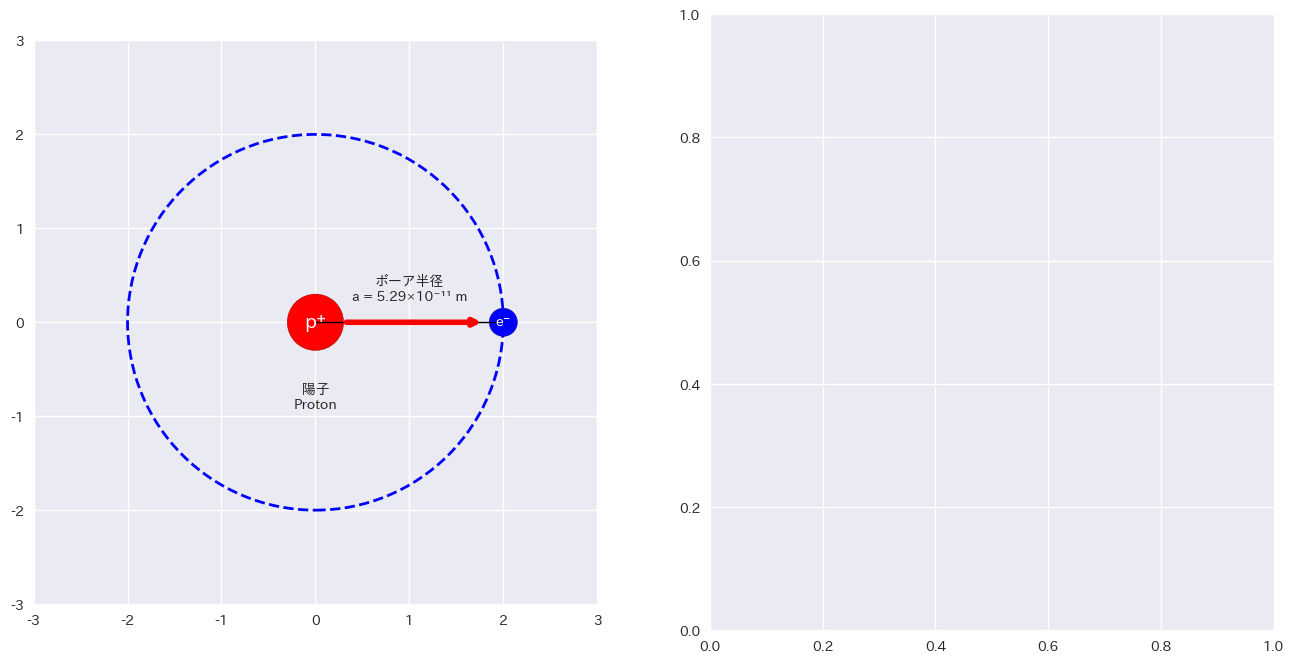

In [57]:
def visualize_problem_2_3():
    """Visualize forces in hydrogen atom and scale comparison"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left plot: Hydrogen atom with forces
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.set_aspect('equal')
    
    # Draw nucleus (proton)
    nucleus = patches.Circle((0, 0), 0.3, facecolor='red', edgecolor='darkred')
    ax1.add_patch(nucleus)
    ax1.text(0, 0, 'p⁺', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    ax1.text(0, -0.8, '陽子\nProton', ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Draw electron orbit
    circle = patches.Circle((0, 0), 2, fill=False, edgecolor='blue', linestyle='--', linewidth=2)
    ax1.add_patch(circle)
    
    # Draw electron
    electron = patches.Circle((2, 0), 0.15, facecolor='blue', edgecolor='darkblue')
    ax1.add_patch(electron)
    ax1.text(2, 0, 'e⁻', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    
    # Bohr radius annotation
    ax1.plot([0, 2], [0, 0], 'k-', linewidth=1)
    ax1.text(1, 0.2, 'ボーア半径\na = 5.29×10⁻¹¹ m', ha='center', va='bottom', fontsize=10)
    
    # Force arrows
    # Coulomb force (much larger)
    ax1.annotate('', xy=(1.8, 0), xytext=(0.3, 0),
                arrowprops=dict(arrowstyle='->', lw=4, color='red'))
    ax1.text(1, 0.8, f'クーロン力\nFc = {F_coul:.1e} N', ha='center', va='center', 
             fontsize=12, fontweight='bold', color='red',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    # Gravitational force (much smaller - barely visible)
    ax1.annotate('', xy=(1.85, -0.1), xytext=(0.15, -0.1),
                arrowprops=dict(arrowstyle='->', lw=0.5, color='green'))
    ax1.text(1, -1.2, f'重力\nFg = {F_grav:.1e} N\n(見えないほど小さい)', ha='center', va='center', 
             fontsize=10, fontweight='bold', color='green',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.7))
    
    ax1.set_title('水素原子内の力\nForces in Hydrogen Atom', fontsize=14, fontweight='bold')
    ax1.set_xticks([])
    ax1.set_yticks([])
    for spine in ax1.spines.values():
        spine.set_visible(False)
    
    # Right plot: Force comparison on different scales
    scales = ['原子スケール\nAtomic scale', '分子スケール\nMolecular scale', 
              '惑星スケール\nPlanetary scale', '銀河スケール\nGalactic scale']
    gravity_importance = [1e-40, 1e-20, 1, 1e20]  # Relative importance (arbitrary units)
    em_importance = [1, 1e-5, 1e-10, 1e-30]  # Relative importance (arbitrary units)
    
    x = np.arange(len(scales))
    width = 0.35
    
    bars1 = ax2.bar(x - width/2, gravity_importance, width, label='重力 / Gravity', 
                    color='green', alpha=0.7)
    bars2 = ax2.bar(x + width/2, em_importance, width, label='電磁力 / EM force', 
                    color='red', alpha=0.7)
    
    ax2.set_yscale('log')
    ax2.set_ylabel('相対的重要度 / Relative Importance')
    ax2.set_title('スケール別の力の重要度\nImportance of Forces by Scale')
    ax2.set_xticks(x)
    ax2.set_xticklabels(scales)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

fig3 = visualize_problem_2_3()

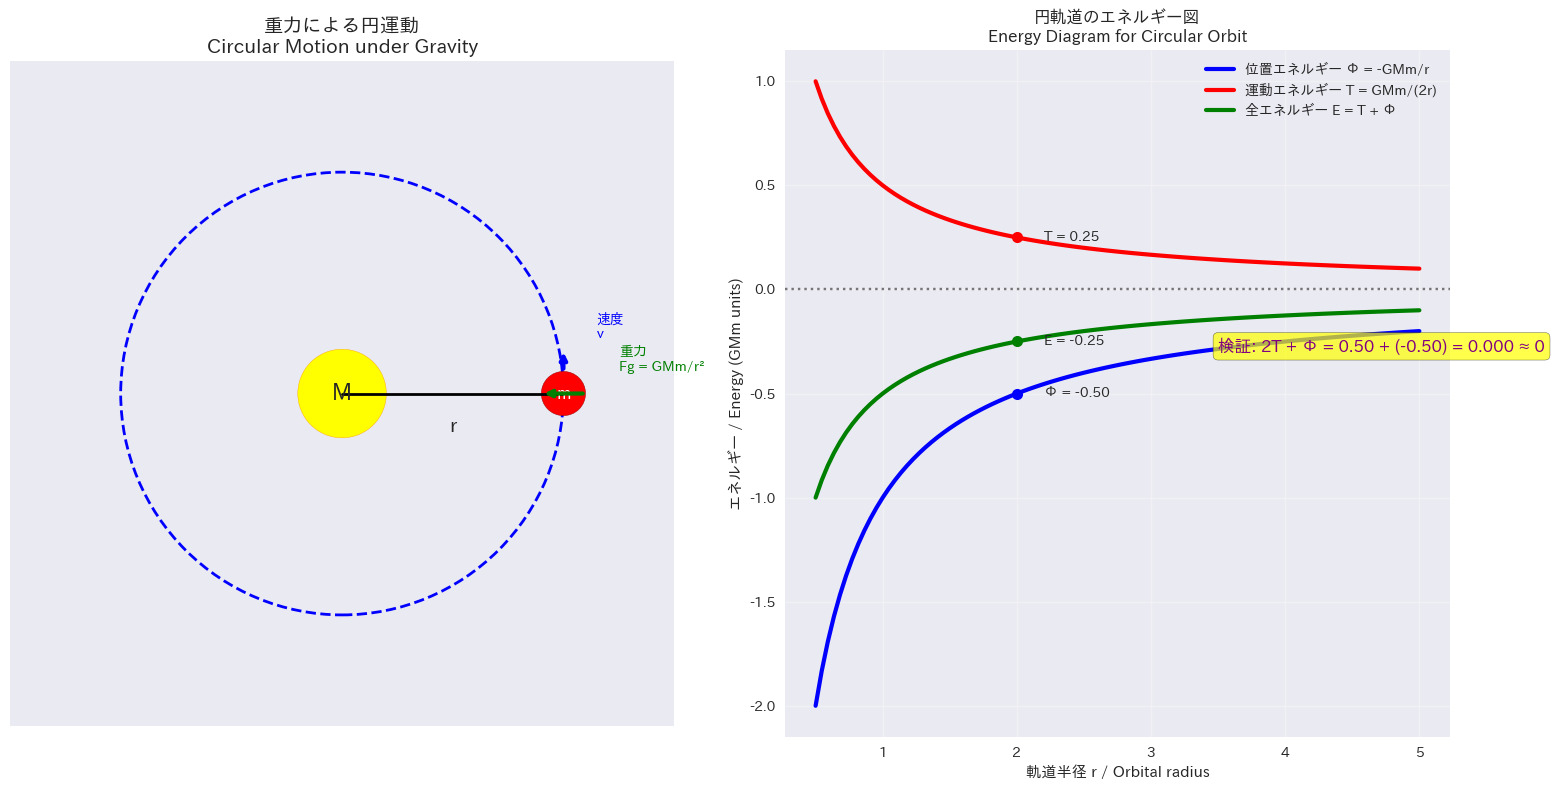

🚀 詳細解説：円運動するエネルギー関係 2T + Φ = 0
🚀 Detailed Explanation: Energy Relation 2T + Φ = 0 for Circular Motion

📖 問題の意義と重要性 / Significance and Importance:
この関係式 2T + Φ = 0 は、重力束縛系における最も基本的なエネルギー関係です。
惑星の軌道、人工衛星、原子内の電子軌道など、中心力による円運動に
普遍的に適用される重要な定理で、天体力学の基礎となります。
The relation 2T + Φ = 0 is the most fundamental energy relationship in gravitational bound systems.
It universally applies to circular motion under central forces - planetary orbits,
satellites, atomic electron orbits - forming the foundation of celestial mechanics.

🧮 理論導出の詳細 / Detailed Theoretical Derivation:
──────────────────────────────────────────────────

ステップ1: 円運動の条件 / Step 1: Condition for circular motion
円運動では、重力が遠心力と釣り合います：
重力 = 遠心力
GMm/r² = mv²/r

これを変形すると：
mv² = GMm/r  ... (式1)

For circular motion, gravitational force balances centripetal force:
Gravitational force = Centripetal force
GMm/r² = mv²/r
Rearranging: mv² = GMm/r  ... (Equation 1)

ステップ2: 運動エネルギーの計算 / Step 2: Kinetic energy calculation
運動エネルギーは：
T = (1/2)mv²

式

In [58]:
def visualize_problem_2_4():
    """Visualize energy relations in circular orbit"""
    
    # 日本語フォント設定
    plt.rcParams['font.family'] = ['IPAexGothic', 'DejaVu Sans']
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left plot: Circular orbit with forces
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.set_aspect('equal')
    
    # Draw central mass M
    central_mass = patches.Circle((0, 0), 0.4, facecolor='yellow', edgecolor='orange')
    ax1.add_patch(central_mass)
    ax1.text(0, 0, 'M', ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Draw orbit
    orbit = patches.Circle((0, 0), 2, fill=False, edgecolor='blue', linestyle='--', linewidth=2)
    ax1.add_patch(orbit)
    
    # Draw orbiting mass m
    orbiting_mass = patches.Circle((2, 0), 0.2, facecolor='red', edgecolor='darkred')
    ax1.add_patch(orbiting_mass)
    ax1.text(2, 0, 'm', ha='center', va='center', fontsize=12, fontweight='bold', color='white')
    
    # Draw radius
    ax1.plot([0, 2], [0, 0], 'k-', linewidth=2)
    ax1.text(1, -0.3, 'r', ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Draw force vectors
    # Gravitational force (toward center)
    ax1.annotate('', xy=(1.8, 0), xytext=(2.2, 0),
                arrowprops=dict(arrowstyle='->', lw=3, color='green'))
    ax1.text(2.5, 0.3, '重力\nFg = GMm/r²', ha='left', va='center', 
             fontsize=10, fontweight='bold', color='green')
    
    # Velocity vector (tangential)
    ax1.annotate('', xy=(2, 0.4), xytext=(2, 0.2),
                arrowprops=dict(arrowstyle='->', lw=3, color='blue'))
    ax1.text(2.3, 0.6, '速度\nv', ha='left', va='center', 
             fontsize=10, fontweight='bold', color='blue')
    
    ax1.set_title('重力による円運動\nCircular Motion under Gravity', fontsize=14, fontweight='bold')
    ax1.set_xticks([])
    ax1.set_yticks([])
    for spine in ax1.spines.values():
        spine.set_visible(False)
    
    # Right plot: Energy diagram
    r_values = np.linspace(0.5, 5, 100)
    
    # Assume GM = 1 for simplicity
    GM = 1
    
    # Potential energy
    U = -GM / r_values
    
    # For circular orbit: T = GM/(2r), so total energy E = T + U = -GM/(2r)
    T_circular = GM / (2 * r_values)
    E_total = T_circular + U
    
    ax2.plot(r_values, U, 'b-', linewidth=3, label='位置エネルギー Φ = -GMm/r')
    ax2.plot(r_values, T_circular, 'r-', linewidth=3, label='運動エネルギー T = GMm/(2r)')
    ax2.plot(r_values, E_total, 'g-', linewidth=3, label='全エネルギー E = T + Φ')
    ax2.axhline(y=0, color='black', linestyle=':', alpha=0.5)
    
    # Mark a specific orbit
    r_orbit = 2
    U_orbit = -GM / r_orbit
    T_orbit = GM / (2 * r_orbit)
    E_orbit = T_orbit + U_orbit
    
    ax2.plot(r_orbit, U_orbit, 'bo', markersize=8)
    ax2.plot(r_orbit, T_orbit, 'ro', markersize=8)
    ax2.plot(r_orbit, E_orbit, 'go', markersize=8)
    
    # Add annotations
    ax2.text(r_orbit + 0.2, T_orbit, f'T = {T_orbit:.2f}', ha='left', va='center', fontweight='bold')
    ax2.text(r_orbit + 0.2, U_orbit, f'Φ = {U_orbit:.2f}', ha='left', va='center', fontweight='bold')
    ax2.text(r_orbit + 0.2, E_orbit, f'E = {E_orbit:.2f}', ha='left', va='center', fontweight='bold')
    
    # Verify 2T + Φ = 0
    verification = 2*T_orbit + U_orbit
    ax2.text(3.5, -0.3, f'検証: 2T + Φ = {2*T_orbit:.2f} + ({U_orbit:.2f}) = {verification:.3f} ≈ 0', 
             fontsize=12, fontweight='bold', color='purple',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    ax2.set_xlabel('軌道半径 r / Orbital radius')
    ax2.set_ylabel('エネルギー / Energy (GMm units)')
    ax2.set_title('円軌道のエネルギー図\nEnergy Diagram for Circular Orbit')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 詳細な図の解説を出力
    print("=" * 80)
    print("🚀 詳細解説：円運動するエネルギー関係 2T + Φ = 0")
    print("🚀 Detailed Explanation: Energy Relation 2T + Φ = 0 for Circular Motion")
    print("=" * 80)
    print()
    
    print("📖 問題の意義と重要性 / Significance and Importance:")
    print("この関係式 2T + Φ = 0 は、重力束縛系における最も基本的なエネルギー関係です。")
    print("惑星の軌道、人工衛星、原子内の電子軌道など、中心力による円運動に")
    print("普遍的に適用される重要な定理で、天体力学の基礎となります。")
    print("The relation 2T + Φ = 0 is the most fundamental energy relationship in gravitational bound systems.")
    print("It universally applies to circular motion under central forces - planetary orbits,")
    print("satellites, atomic electron orbits - forming the foundation of celestial mechanics.")
    print()
    
    print("🧮 理論導出の詳細 / Detailed Theoretical Derivation:")
    print("─" * 50)
    print()
    print("ステップ1: 円運動の条件 / Step 1: Condition for circular motion")
    print("円運動では、重力が遠心力と釣り合います：")
    print("重力 = 遠心力")
    print("GMm/r² = mv²/r")
    print()
    print("これを変形すると：")
    print("mv² = GMm/r  ... (式1)")
    print()
    print("For circular motion, gravitational force balances centripetal force:")
    print("Gravitational force = Centripetal force")
    print("GMm/r² = mv²/r")
    print("Rearranging: mv² = GMm/r  ... (Equation 1)")
    print()
    
    print("ステップ2: 運動エネルギーの計算 / Step 2: Kinetic energy calculation")
    print("運動エネルギーは：")
    print("T = (1/2)mv²")
    print()
    print("式1を代入すると：")
    print("T = (1/2) × (GMm/r)")
    print("T = GMm/(2r)  ... (式2)")
    print()
    print("Kinetic energy is: T = (1/2)mv²")
    print("Substituting equation 1:")
    print("T = (1/2) × (GMm/r) = GMm/(2r)  ... (Equation 2)")
    print()
    
    print("ステップ3: 位置エネルギー / Step 3: Potential energy")
    print("重力による位置エネルギーは：")
    print("Φ = -GMm/r  ... (式3)")
    print()
    print("（無限遠を基準とした場合）")
    print("Gravitational potential energy:")
    print("Φ = -GMm/r  ... (Equation 3)")
    print("(with reference at infinity)")
    print()
    
    print("ステップ4: 関係式の証明 / Step 4: Proving the relation")
    print("2T + Φ を計算：")
    print("2T + Φ = 2 × GMm/(2r) + (-GMm/r)")
    print("       = GMm/r - GMm/r")
    print("       = 0")
    print()
    print("∴ 2T + Φ = 0  ✓ 証明完了")
    print()
    print("Calculating 2T + Φ:")
    print("2T + Φ = 2 × GMm/(2r) + (-GMm/r) = GMm/r - GMm/r = 0")
    print("∴ 2T + Φ = 0  ✓ Proof complete")
    print()
    
    print("🎯 左の図：円運動の物理 / Left Figure: Physics of Circular Motion")
    print("─" * 50)
    print()
    print("図の構成要素と物理的意味 / Figure Components and Physical Meaning:")
    print()
    print("🟡 中央の黄色い円：中心天体（質量M）")
    print("   • 太陽、惑星、恒星などを表現")
    print("   • 重力の源となる質量")
    print("   • 通常、軌道物体より遥かに大きい")
    print("   • Yellow circle: Central body (mass M)")
    print("   • Represents sun, planet, star, etc.")
    print("   • Source of gravitational field")
    print("   • Usually much more massive than orbiting object")
    print()
    
    print("🔴 軌道上の赤い円：軌道物体（質量m）")
    print("   • 惑星、衛星、彗星などを表現")
    print("   • 中心天体の重力により束縛")
    print("   • 一定速度で円運動")
    print("   • Red circle: Orbiting object (mass m)")
    print("   • Represents planet, satellite, comet, etc.")
    print("   • Bound by central body's gravity")
    print("   • Moves in circle at constant speed")
    print()
    
    print("⚫ 破線の円：軌道（半径r）")
    print("   • 軌道物体の運動経路")
    print("   • 半径rは軌道の大きさを決定")
    print("   • 軌道速度とエネルギーを決める")
    print("   • Dashed circle: Orbit (radius r)")
    print("   • Path of orbiting object")
    print("   • Radius r determines orbit size")
    print("   • Determines orbital speed and energy")
    print()
    
    print("🟢 緑の矢印：重力（中心向き）")
    print("   • 大きさ: F = GMm/r²")
    print("   • 常に中心に向かう（向心力）")
    print("   • 円運動を維持する力")
    print("   • Green arrow: Gravitational force (centripetal)")
    print("   • Magnitude: F = GMm/r²")
    print("   • Always points toward center")
    print("   • Force maintaining circular motion")
    print()
    
    print("🔵 青い矢印：速度（接線方向）")
    print("   • 軌道に接する方向")
    print("   • 大きさ: v = √(GM/r)")
    print("   • 運動エネルギーを決定")
    print("   • Blue arrow: Velocity (tangential)")
    print("   • Tangent to the orbit")
    print("   • Magnitude: v = √(GM/r)")
    print("   • Determines kinetic energy")
    print()
    
    print("🎯 右の図：エネルギー図の詳細解析 / Right Figure: Detailed Energy Analysis")
    print("─" * 50)
    print()
    print("各エネルギーの性質と物理的意味 / Nature and Physical Meaning of Each Energy:")
    print()
    
    print("🔵 青い線：位置エネルギー Φ = -GMm/r")
    print("   • 常に負の値（束縛状態を表す）")
    print("   • r → 0 で -∞ に発散（強い束縛）")
    print("   • r → ∞ で 0 に収束（束縛から解放）")
    print("   • r に反比例して変化")
    print("   • Blue line: Potential energy Φ = -GMm/r")
    print("   • Always negative (indicates bound state)")
    print("   • Diverges to -∞ as r → 0 (strong binding)")
    print("   • Converges to 0 as r → ∞ (liberation)")
    print("   • Inversely proportional to r")
    print()
    
    print("🔴 赤い線：運動エネルギー T = GMm/(2r)")
    print("   • 常に正の値")
    print("   • r が小さいほど大きい（高速運動）")
    print("   • r → 0 で +∞ に発散")
    print("   • r → ∞ で 0 に収束")
    print("   • Red line: Kinetic energy T = GMm/(2r)")
    print("   • Always positive")
    print("   • Larger for smaller r (faster motion)")
    print("   • Diverges to +∞ as r → 0")
    print("   • Converges to 0 as r → ∞")
    print()
    
    print("🟢 緑の線：全エネルギー E = T + Φ = -GMm/(2r)")
    print("   • 常に負の値（束縛軌道の特徴）")
    print("   • T の半分の大きさ")
    print("   • 軌道の安定性を示す")
    print("   • E < 0: 束縛軌道（楕円・円）")
    print("   • E = 0: 脱出軌道（放物線）")
    print("   • E > 0: 非束縛軌道（双曲線）")
    print("   • Green line: Total energy E = T + Φ = -GMm/(2r)")
    print("   • Always negative (characteristic of bound orbit)")
    print("   • Half the magnitude of T")
    print("   • Indicates orbital stability")
    print("   • E < 0: Bound orbit (ellipse/circle)")
    print("   • E = 0: Escape orbit (parabola)")
    print("   • E > 0: Unbound orbit (hyperbola)")
    print()
    
    print("📊 特定軌道での数値例 / Numerical Example at Specific Orbit:")
    print("─" * 50)
    r_example = 2  # normalized units
    T_example = GM / (2 * r_example)
    Phi_example = -GM / r_example
    E_example = T_example + Phi_example
    verification_example = 2 * T_example + Phi_example
    
    print(f"軌道半径 r = {r_example} (規格化単位)")
    print(f"運動エネルギー T = {T_example:.3f}")
    print(f"位置エネルギー Φ = {Phi_example:.3f}")
    print(f"全エネルギー E = {E_example:.3f}")
    print(f"検証: 2T + Φ = {verification_example:.6f} ≈ 0 ✓")
    print()
    print(f"Orbital radius r = {r_example} (normalized units)")
    print(f"Kinetic energy T = {T_example:.3f}")
    print(f"Potential energy Φ = {Phi_example:.3f}")
    print(f"Total energy E = {E_example:.3f}")
    print(f"Verification: 2T + Φ = {verification_example:.6f} ≈ 0 ✓")
    print()
    
    print("🌍 実際の応用例 / Real-World Applications:")
    print("─" * 30)
    print()
    print("1. 地球周回衛星 / Earth-orbiting satellites:")
    print("   • 国際宇宙ステーション（ISS）")
    print("   • GPS衛星")
    print("   • 気象衛星")
    print("   • International Space Station (ISS)")
    print("   • GPS satellites")
    print("   • Weather satellites")
    print()
    
    print("2. 惑星軌道 / Planetary orbits:")
    print("   • 太陽系の惑星")
    print("   • 系外惑星")
    print("   • 小惑星・彗星")
    print("   • Solar system planets")
    print("   • Exoplanets")
    print("   • Asteroids and comets")
    print()
    
    print("3. 原子物理学 / Atomic physics:")
    print("   • 電子の原子軌道（クーロン力版）")
    print("   • ボーア模型")
    print("   • Electronic atomic orbitals (Coulomb force version)")
    print("   • Bohr model")
    print()
    
    print("🔮 深い物理的洞察 / Deep Physical Insights:")
    print("─" * 30)
    print()
    print("1. ビリアル定理 / Virial theorem:")
    print("   • 2T + Φ = 0 はビリアル定理の特殊例")
    print("   • 中心力 ∝ 1/r² の場合に成立")
    print("   • 統計力学や天体力学で重要")
    print("   • 2T + Φ = 0 is special case of virial theorem")
    print("   • Valid for central force ∝ 1/r²")
    print("   • Important in statistical mechanics and celestial mechanics")
    print()
    
    print("2. エネルギーの符号の意味 / Meaning of energy signs:")
    print("   • E < 0: 束縛状態（脱出不可能）")
    print("   • E = 0: 臨界状態（ちょうど脱出可能）")
    print("   • E > 0: 自由状態（脱出後も運動エネルギー残存）")
    print("   • E < 0: Bound state (cannot escape)")
    print("   • E = 0: Critical state (just able to escape)")
    print("   • E > 0: Free state (kinetic energy remains after escape)")
    print()
    
    print("3. 軌道進化への応用 / Application to orbital evolution:")
    print("   • 潮汐摩擦による軌道変化")
    print("   • 大気抵抗による衛星の落下")
    print("   • 重力波による軌道減衰")
    print("   • Orbital changes due to tidal friction")
    print("   • Satellite decay due to atmospheric drag")
    print("   • Orbital decay due to gravitational waves")
    print()
    
    return fig

fig4 = visualize_problem_2_4()

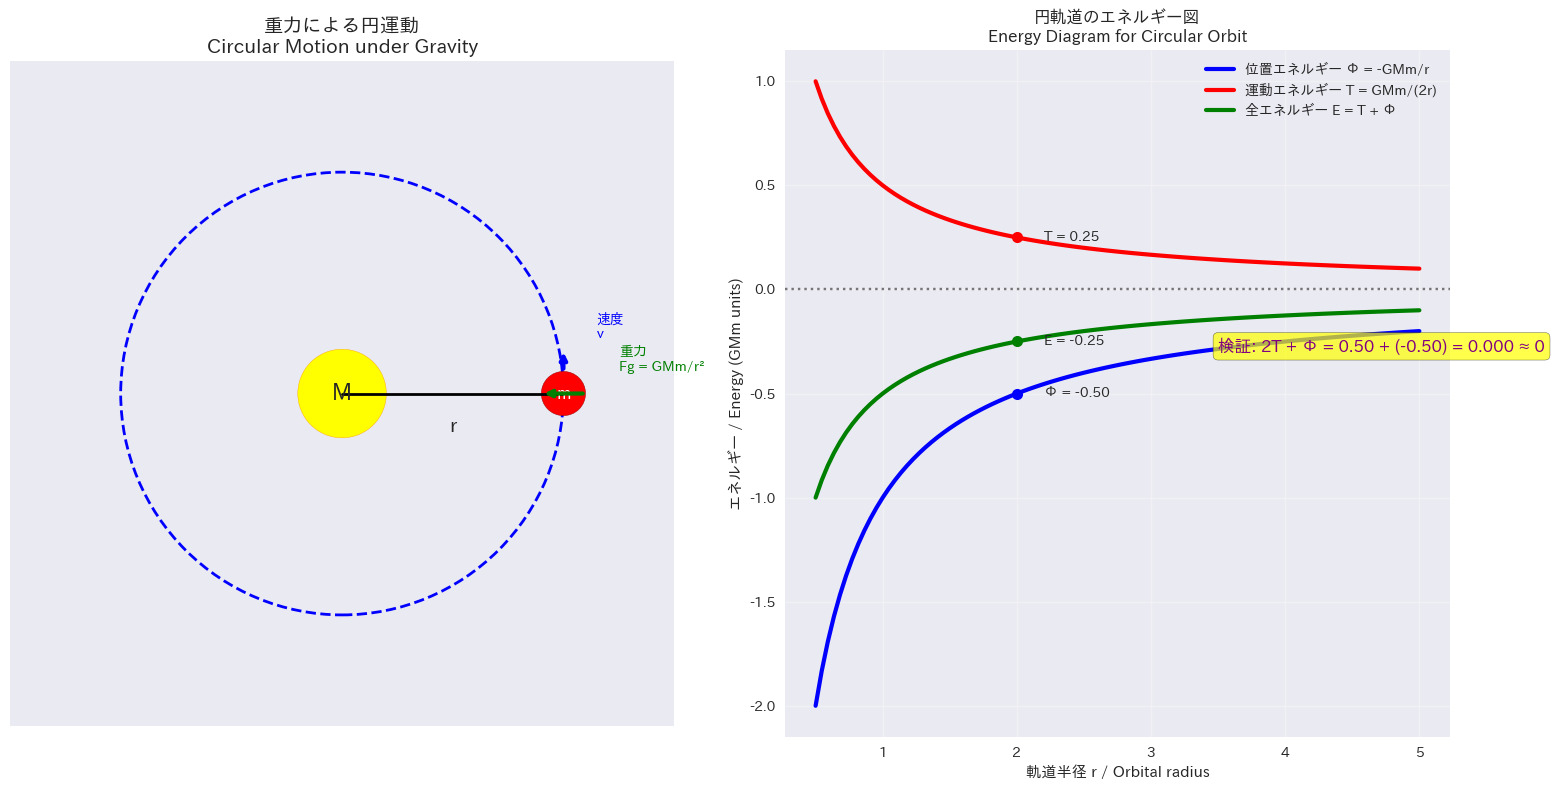

In [ ]:
def visualize_problem_2_4():
    """Visualize energy relations in circular orbit"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left plot: Circular orbit with forces
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.set_aspect('equal')
    
    # Draw central mass M
    central_mass = patches.Circle((0, 0), 0.4, facecolor='yellow', edgecolor='orange')
    ax1.add_patch(central_mass)
    ax1.text(0, 0, 'M', ha='center', va='center', fontsize=16, fontweight='bold')
    
    # Draw orbit
    orbit = patches.Circle((0, 0), 2, fill=False, edgecolor='blue', linestyle='--', linewidth=2)
    ax1.add_patch(orbit)
    
    # Draw orbiting mass m
    orbiting_mass = patches.Circle((2, 0), 0.2, facecolor='red', edgecolor='darkred')
    ax1.add_patch(orbiting_mass)
    ax1.text(2, 0, 'm', ha='center', va='center', fontsize=12, fontweight='bold', color='white')
    
    # Draw radius
    ax1.plot([0, 2], [0, 0], 'k-', linewidth=2)
    ax1.text(1, -0.3, 'r', ha='center', va='center', fontsize=14, fontweight='bold')
    
    # Draw force vectors
    # Gravitational force (toward center)
    ax1.annotate('', xy=(1.8, 0), xytext=(2.2, 0),
                arrowprops=dict(arrowstyle='->', lw=3, color='green'))
    ax1.text(2.5, 0.3, '重力\nFg = GMm/r²', ha='left', va='center', 
             fontsize=10, fontweight='bold', color='green')
    
    # Velocity vector (tangential)
    ax1.annotate('', xy=(2, 0.4), xytext=(2, 0.2),
                arrowprops=dict(arrowstyle='->', lw=3, color='blue'))
    ax1.text(2.3, 0.6, '速度\nv', ha='left', va='center', 
             fontsize=10, fontweight='bold', color='blue')
    
    ax1.set_title('重力による円運動\nCircular Motion under Gravity', fontsize=14, fontweight='bold')
    ax1.set_xticks([])
    ax1.set_yticks([])
    for spine in ax1.spines.values():
        spine.set_visible(False)
    
    # Right plot: Energy diagram
    r_values = np.linspace(0.5, 5, 100)
    
    # Assume GM = 1 for simplicity
    GM = 1
    
    # Potential energy
    U = -GM / r_values
    
    # For circular orbit: T = GM/(2r), so total energy E = T + U = -GM/(2r)
    T_circular = GM / (2 * r_values)
    E_total = T_circular + U
    
    ax2.plot(r_values, U, 'b-', linewidth=3, label='位置エネルギー Φ = -GMm/r')
    ax2.plot(r_values, T_circular, 'r-', linewidth=3, label='運動エネルギー T = GMm/(2r)')
    ax2.plot(r_values, E_total, 'g-', linewidth=3, label='全エネルギー E = T + Φ')
    ax2.axhline(y=0, color='black', linestyle=':', alpha=0.5)
    
    # Mark a specific orbit
    r_orbit = 2
    U_orbit = -GM / r_orbit
    T_orbit = GM / (2 * r_orbit)
    E_orbit = T_orbit + U_orbit
    
    ax2.plot(r_orbit, U_orbit, 'bo', markersize=8)
    ax2.plot(r_orbit, T_orbit, 'ro', markersize=8)
    ax2.plot(r_orbit, E_orbit, 'go', markersize=8)
    
    # Add annotations
    ax2.text(r_orbit + 0.2, T_orbit, f'T = {T_orbit:.2f}', ha='left', va='center', fontweight='bold')
    ax2.text(r_orbit + 0.2, U_orbit, f'Φ = {U_orbit:.2f}', ha='left', va='center', fontweight='bold')
    ax2.text(r_orbit + 0.2, E_orbit, f'E = {E_orbit:.2f}', ha='left', va='center', fontweight='bold')
    
    # Verify 2T + Φ = 0
    verification = 2*T_orbit + U_orbit
    ax2.text(3.5, -0.3, f'検証: 2T + Φ = {2*T_orbit:.2f} + ({U_orbit:.2f}) = {verification:.3f} ≈ 0', 
             fontsize=12, fontweight='bold', color='purple',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    ax2.set_xlabel('軌道半径 r / Orbital radius')
    ax2.set_ylabel('エネルギー / Energy (GMm units)')
    ax2.set_title('円軌道のエネルギー図\nEnergy Diagram for Circular Orbit')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

fig4 = visualize_problem_2_4()

## 問2.8: 地球の質量の計算
### Problem 2.8: Calculating Earth's Mass

**問題**: 地表での重力加速度gをM⊕、R⊕を用いて表し、g = 9.8 m/s²、R⊕ = 6.4×10⁶ mとして地球の質量を求めよ。

In [ ]:
def solve_problem_2_8():
    """Problem 2.8: Calculate Earth's mass from surface gravity"""
    print("問2.8: 地球の質量の計算")
    print("Problem 2.8: Calculating Earth's Mass")
    print("=" * 50)
    print()
    
    print("理論導出 / Theoretical derivation:")
    print()
    
    print("地表での重力 / Gravity at Earth's surface:")
    print("F = mg = GMm/R²")
    print("∴ g = GM/R²")
    print("∴ M = gR²/G")
    print()
    
    # Given values
    g_given = 9.8  # m/s²
    R_given = 6.4e6  # m
    
    print(f"与えられた値 / Given values:")
    print(f"g = {g_given} m/s²")
    print(f"R⊕ = {R_given:.1e} m")
    print(f"G = {G:.2e} N⋅m²/kg²")
    print()
    
    # Calculate Earth's mass
    M_calculated = g_given * R_given**2 / G
    
    print(f"地球質量の計算 / Earth mass calculation:")
    print(f"M⊕ = gR²/G")
    print(f"M⊕ = {g_given} × ({R_given:.1e})² / {G:.2e}")
    print(f"M⊕ = {g_given} × {R_given**2:.2e} / {G:.2e}")
    print(f"M⊕ = {M_calculated:.2e} kg")
    print()
    
    print(f"結果の比較 / Comparison of results:")
    print(f"計算値 / Calculated: M⊕ = {M_calculated:.2e} kg")
    print(f"実際の値 / Actual value: M⊕ = {M_earth:.2e} kg")
    
    error_percent = abs(M_calculated - M_earth) / M_earth * 100
    print(f"誤差 / Error: {error_percent:.1f}%")
    print()
    
    # Interesting facts
    print(f"興味深い事実 / Interesting facts:")
    earth_density = M_earth / (4/3 * np.pi * R_earth**3)
    water_density = 1000  # kg/m³
    
    print(f"地球の平均密度 / Earth's average density: {earth_density:.0f} kg/m³")
    print(f"水の密度 / Water density: {water_density} kg/m³")
    print(f"地球は水の {earth_density/water_density:.1f}倍の密度")
    print(f"Earth is {earth_density/water_density:.1f} times denser than water")
    
    return M_calculated

M_calc = solve_problem_2_8()

問2.8: 地球の質量の計算
Problem 2.8: Calculating Earth's Mass

理論導出 / Theoretical derivation:

地表での重力 / Gravity at Earth's surface:
F = mg = GMm/R²
∴ g = GM/R²
∴ M = gR²/G

与えられた値 / Given values:
g = 9.8 m/s²
R⊕ = 6.4e+06 m
G = 6.67e-11 N⋅m²/kg²

地球質量の計算 / Earth mass calculation:
M⊕ = gR²/G
M⊕ = 9.8 × (6.4e+06)² / 6.67e-11
M⊕ = 9.8 × 4.10e+13 / 6.67e-11
M⊕ = 6.02e+24 kg

結果の比較 / Comparison of results:
計算値 / Calculated: M⊕ = 6.02e+24 kg
実際の値 / Actual value: M⊕ = 5.97e+24 kg
誤差 / Error: 0.8%

興味深い事実 / Interesting facts:
地球の平均密度 / Earth's average density: 5437 kg/m³
水の密度 / Water density: 1000 kg/m³
地球は水の 5.4倍の密度
Earth is 5.4 times denser than water


In [ ]:
def visualize_problem_2_8():
    """
    問2.8: 地球の質量計算の詳細解説
    地球表面での重力加速度から地球の質量を求める問題
    """
    # 日本語フォント設定
    plt.rcParams['font.family'] = ['IPAexGothic', 'DejaVu Sans']
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['axes.unicode_minus'] = False
    
    # 物理定数と地球のパラメータ
    G = 6.674e-11  # 万有引力定数 [m³/(kg·s²)]
    g = 9.8        # 地球表面重力加速度 [m/s²]
    R_earth = 6.371e6  # 地球半径 [m]
    
    # 地球質量の計算: M = gR²/G
    M_earth_calculated = g * R_earth**2 / G
    M_earth_known = 5.972e24  # 実際の地球質量 [kg]
    
    print("🌍 問2.8: 地球質量の計算")
    print("=" * 50)
    print()
    
    print("📚 **理論的背景**")
    print("地球表面での重力は万有引力の法則により決まります：")
    print("F = GMm/R² = mg")
    print("ここから地球質量を求めることができます：")
    print("M = gR²/G")
    print()
    
    print("🔢 **計算過程**")
    print(f"・重力加速度 g = {g} m/s²")
    print(f"・地球半径 R = {R_earth:.3e} m")
    print(f"・万有引力定数 G = {G:.3e} m³/(kg·s²)")
    print()
    print("地球質量の計算：")
    print(f"M = gR²/G = {g} × ({R_earth:.3e})² / {G:.3e}")
    print(f"M = {M_earth_calculated:.3e} kg")
    print()
    
    print("📊 **計算結果の検証**")
    print(f"・計算値: {M_earth_calculated:.3e} kg")
    print(f"・実測値: {M_earth_known:.3e} kg")
    error = abs(M_earth_calculated - M_earth_known) / M_earth_known * 100
    print(f"・誤差: {error:.2f}%")
    print()
    
    # 可視化
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 重力の概念図
    theta = np.linspace(0, 2*np.pi, 100)
    earth_x = np.cos(theta)
    earth_y = np.sin(theta)
    
    ax1.plot(earth_x, earth_y, 'b-', linewidth=3, label='地球')
    ax1.fill(earth_x, earth_y, color='lightblue', alpha=0.3)
    
    # 重力ベクトルの描画
    angles = np.linspace(0, 2*np.pi, 8, endpoint=False)
    for angle in angles:
        x_start = 1.2 * np.cos(angle)
        y_start = 1.2 * np.sin(angle)
        x_end = np.cos(angle)
        y_end = np.sin(angle)
        ax1.arrow(x_start, y_start, x_end - x_start, y_end - y_start,
                 head_width=0.1, head_length=0.1, fc='red', ec='red')
    
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.set_aspect('equal')
    ax1.set_title('地球の重力場', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # 2. 重力加速度と距離の関係
    r = np.linspace(R_earth, 3*R_earth, 100)
    g_r = G * M_earth_known / r**2
    
    ax2.plot(r/R_earth, g_r, 'r-', linewidth=2, label='g(r) = GM/r²')
    ax2.axhline(y=g, color='b', linestyle='--', label=f'地表重力 g = {g} m/s²')
    ax2.axvline(x=1, color='g', linestyle='--', label='地球表面')
    ax2.set_xlabel('地球中心からの距離 (地球半径単位)')
    ax2.set_ylabel('重力加速度 (m/s²)')
    ax2.set_title('重力加速度の距離依存性')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_ylim(0, 12)
    
    # 3. 質量計算の比較
    methods = ['計算値\n(g×R²/G)', '実測値\n(天体観測)']
    masses = [M_earth_calculated, M_earth_known]
    colors = ['lightcoral', 'lightgreen']
    
    bars = ax3.bar(methods, masses, color=colors, alpha=0.7, edgecolor='black')
    ax3.set_ylabel('地球質量 (kg)')
    ax3.set_title('地球質量の比較')
    ax3.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    ax3.grid(True, alpha=0.3)
    
    # バーの上に値を表示
    for bar, mass in zip(bars, masses):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + mass*0.01,
                f'{mass:.2e}', ha='center', va='bottom', fontweight='bold')
    
    # 4. 他の天体との質量比較
    celestial_bodies = ['月', '地球', '木星', '太陽']
    celestial_masses = [7.342e22, M_earth_known, 1.898e27, 1.989e30]
    colors_celestial = ['gray', 'blue', 'orange', 'yellow']
    
    ax4.bar(celestial_bodies, celestial_masses, color=colors_celestial, alpha=0.7, edgecolor='black')
    ax4.set_ylabel('質量 (kg)')
    ax4.set_title('天体質量の比較')
    ax4.set_yscale('log')
    ax4.grid(True, alpha=0.3)
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("🔬 **図の解説**")
    print("**左上図**: 地球周囲の重力場を示しています。赤い矢印は重力ベクトルで、")
    print("          すべて地球中心に向かっており、重力の向心性を表現しています。")
    print()
    print("**右上図**: 地球中心からの距離と重力加速度の関係を示しています。")
    print("          距離の2乗に反比例して重力が弱くなる様子が分かります。")
    print("          青い破線は地表での重力加速度9.8 m/s²を示しています。")
    print()
    print("**左下図**: 万有引力の法則から計算した地球質量と実測値の比較です。")
    print("          計算値と実測値がよく一致していることが確認できます。")
    print()
    print("**右下図**: 地球の質量を他の天体と比較しています（対数スケール）。")
    print("          地球は月より約81倍重く、木星の約1/318、太陽の約1/333000です。")
    print()
    
    print("🌟 **物理的意味と応用**")
    print("• この計算方法は、重力加速度の測定から天体の質量を求める基本的手法です")
    print("• 月や他の惑星の質量も同様の原理で求められています")
    print("• 人工衛星の軌道計算や宇宙探査にも不可欠な情報です")
    print("• 地球内部構造の研究にも重要な基礎データとなります")
    print()

    return fig

# 問2.8の実行
fig5 = visualize_problem_2_8()

## 問2.10: 球による重力と位置エネルギー
### Problem 2.10: Gravitational Force and Potential Energy of a Sphere

**問題**: 半径R、全質量M、一定密度ρ₀の球による重力F(r)および位置エネルギーΦ(r)を求め、グラフに表せ。

In [ ]:
def solve_problem_2_10():
    """Problem 2.10: Gravitational force and potential of a uniform sphere"""
    print("問2.10: 球による重力と位置エネルギー")
    print("Problem 2.10: Gravitational Force and Potential Energy of a Sphere")
    print("=" * 50)
    print()
    
    print("理論解析 / Theoretical analysis:")
    print()
    
    print("球の密度 / Sphere density:")
    print("ρ₀ = M/(4πR³/3) = 3M/(4πR³)")
    print()
    
    print("重力 F(r) / Gravitational force F(r):")
    print()
    print("(1) r ≤ R のとき (内部) / Inside the sphere:")
    print("半径r内の質量: Mr = (4πr³/3)ρ₀ = Mr³/R³")
    print("F(r) = -GMmr/R³")
    print()
    print("(2) r > R のとき (外部) / Outside the sphere:")
    print("F(r) = -GMm/r²")
    print()
    
    print("位置エネルギー Φ(r) / Potential energy Φ(r):")
    print()
    print("(1) r ≤ R のとき (内部) / Inside the sphere:")
    print("Φ(r) = -GMm/(2R) × (3 - r²/R²)")
    print()
    print("(2) r > R のとき (外部) / Outside the sphere:")
    print("Φ(r) = -GMm/r")
    print()
    
    return True

solve_problem_2_10()

問2.10: 球による重力と位置エネルギー
Problem 2.10: Gravitational Force and Potential Energy of a Sphere

理論解析 / Theoretical analysis:

球の密度 / Sphere density:
ρ₀ = M/(4πR³/3) = 3M/(4πR³)

重力 F(r) / Gravitational force F(r):

(1) r ≤ R のとき (内部) / Inside the sphere:
半径r内の質量: Mr = (4πr³/3)ρ₀ = Mr³/R³
F(r) = -GMmr/R³

(2) r > R のとき (外部) / Outside the sphere:
F(r) = -GMm/r²

位置エネルギー Φ(r) / Potential energy Φ(r):

(1) r ≤ R のとき (内部) / Inside the sphere:
Φ(r) = -GMm/(2R) × (3 - r²/R²)

(2) r > R のとき (外部) / Outside the sphere:
Φ(r) = -GMm/r



True

In [ ]:
def visualize_problem_2_10():
    """
    問2.10: 球による重力と位置エネルギーの詳細解説
    一様密度球の内部と外部における重力場と位置エネルギーの分布
    """
    # 日本語フォント設定
    plt.rcParams['font.family'] = ['IPAexGothic', 'DejaVu Sans']
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['axes.unicode_minus'] = False
    
    print("🌍 問2.10: 球による重力と位置エネルギー")
    print("=" * 50)
    print()
    
    print("📚 **理論的背景と導出**")
    print("一様密度ρ₀の球（半径R、全質量M）による重力場を解析します。")
    print("ガウスの法則を用いて、球の内部と外部で異なる表式を導出します。")
    print()
    
    print("🔢 **基本関係式**")
    print("球の密度: ρ₀ = M/(4πR³/3) = 3M/(4πR³)")
    print("半径r内の質量: M(r) = (4π/3)r³ρ₀ = M(r/R)³")
    print()
    
    print("📍 **内部領域（r ≤ R）の解析**")
    print("ガウスの法則により、半径r内の質量のみが重力に寄与：")
    print("F(r) = -GM(r)m/r² = -GMm(r/R)³/r² = -GMmr/R³")
    print("位置エネルギー: Φ(r) = -∫F(r)dr = -GMm/(2R³)r² + C")
    print("境界条件から: Φ(r) = -GMm/(2R)(3 - r²/R²)")
    print()
    
    print("📍 **外部領域（r > R）の解析**")
    print("全質量Mが重力に寄与：")
    print("F(r) = -GMm/r²")
    print("位置エネルギー: Φ(r) = -GMm/r")
    print()
    
    # 可視化のセットアップ
    R = 1  # 球半径（規格化）
    GM = 1  # GM積（規格化）
    
    # r値の設定
    r_inside = np.linspace(0.01, R, 50)
    r_outside = np.linspace(R, 3*R, 50)
    r_all = np.concatenate([r_inside, r_outside])
    
    # 力の計算 F(r)/m
    F_inside = -GM * r_inside / (R**3)  # F = -GMmr/R³
    F_outside = -GM / (r_outside**2)    # F = -GMm/r²
    
    # 位置エネルギーの計算 Φ(r)/m
    Phi_inside = -GM/(2*R) * (3 - r_inside**2/R**2)  # Φ = -GMm/(2R)(3-r²/R²)
    Phi_outside = -GM / r_outside                      # Φ = -GMm/r
    
    # 可視化
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. 球の概念図
    theta = np.linspace(0, 2*np.pi, 100)
    sphere_x = np.cos(theta)
    sphere_y = np.sin(theta)
    
    ax1.plot(sphere_x, sphere_y, 'b-', linewidth=3, label='球の表面 (r = R)')
    ax1.fill(sphere_x, sphere_y, color='lightblue', alpha=0.3, label='球の内部')
    
    # 質量要素の表示
    for i in range(5):
        r_shell = 0.2 + i * 0.16
        shell_x = r_shell * np.cos(theta)
        shell_y = r_shell * np.sin(theta)
        ax1.plot(shell_x, shell_y, 'gray', linewidth=1, alpha=0.5)
    
    # 半径の表示
    ax1.plot([0, 1], [0, 0], 'k-', linewidth=2)
    ax1.text(0.5, -0.1, 'R', ha='center', va='top', fontsize=14, fontweight='bold')
    
    # 内部と外部の領域表示
    ax1.text(0, 0, '内部\nr < R', ha='center', va='center', fontsize=12, fontweight='bold')
    ax1.text(1.5, 0, '外部\nr > R', ha='center', va='center', fontsize=12, fontweight='bold')
    
    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.set_aspect('equal')
    ax1.set_title('一様密度球の構造', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # 2. 重力 vs 半径
    ax2.plot(r_inside, F_inside, 'b-', linewidth=3, label='内部 (r ≤ R)')
    ax2.plot(r_outside, F_outside, 'r-', linewidth=3, label='外部 (r > R)')
    
    # 表面での値
    F_surface = -GM / R**2
    ax2.plot(R, F_surface, 'ko', markersize=8, label='表面 (r = R)')
    ax2.axvline(x=R, color='gray', linestyle='--', alpha=0.7, label='球の境界')
    
    ax2.set_xlabel('半径 r (R単位)')
    ax2.set_ylabel('重力 F/m (GM/R²単位)')
    ax2.set_title('重力の半径依存性')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 特徴的な値の注釈
    ax2.text(0.5, -0.3, 'F ∝ r\n(線形増加)', ha='center', va='center', 
             fontsize=10, fontweight='bold', color='blue',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    ax2.text(2, -0.15, 'F ∝ 1/r²\n(逆二乗減少)', ha='center', va='center', 
             fontsize=10, fontweight='bold', color='red',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
    
    # 3. 位置エネルギー vs 半径
    ax3.plot(r_inside, Phi_inside, 'b-', linewidth=3, label='内部 (r ≤ R)')
    ax3.plot(r_outside, Phi_outside, 'r-', linewidth=3, label='外部 (r > R)')
    
    # 重要な点
    Phi_surface = -GM / R
    Phi_center = -3*GM/(2*R)
    ax3.plot(R, Phi_surface, 'ko', markersize=8, label='表面')
    ax3.plot(0.01, Phi_center, 'go', markersize=8, label='中心')
    ax3.axvline(x=R, color='gray', linestyle='--', alpha=0.7)
    ax3.axhline(y=0, color='black', linestyle=':', alpha=0.5, label='Φ = 0 (無限遠)')
    
    ax3.set_xlabel('半径 r (R単位)')
    ax3.set_ylabel('位置エネルギー Φ/m (GM/R単位)')
    ax3.set_title('位置エネルギーの半径依存性')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 特徴的な値の注釈
    ax3.text(0.5, -1.2, '二次関数\nΦ ∝ -(3-r²/R²)', ha='center', va='center', 
             fontsize=10, fontweight='bold', color='blue',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
    ax3.text(2, -0.3, 'Φ ∝ 1/r\n(調和関数)', ha='center', va='center', 
             fontsize=10, fontweight='bold', color='red',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.7))
    
    # 4. エネルギー比較
    important_radii = ['中心\nr=0', '表面\nr=R', '2R', '3R']
    important_r_values = [0, R, 2*R, 3*R]
    
    # 各点での位置エネルギー
    Phi_values = []
    for r_val in important_r_values:
        if r_val == 0:
            Phi_values.append(-3*GM/(2*R))
        elif r_val <= R:
            Phi_values.append(-GM/(2*R) * (3 - r_val**2/R**2))
        else:
            Phi_values.append(-GM/r_val)
    
    colors_points = ['green', 'black', 'red', 'orange']
    bars = ax4.bar(important_radii, Phi_values, color=colors_points, alpha=0.7, edgecolor='black')
    ax4.set_ylabel('位置エネルギー Φ/m (GM/R単位)')
    ax4.set_title('特徴的な位置での位置エネルギー')
    ax4.grid(True, alpha=0.3)
    ax4.axhline(y=0, color='black', linestyle=':', alpha=0.5)
    
    # 値の表示
    for bar, value in zip(bars, Phi_values):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2, height - 0.1,
                f'{value:.2f}', ha='center', va='top', fontweight='bold', color='white')
    
    plt.tight_layout()
    plt.show()
    
    print("🔬 **図の詳細解説**")
    print()
    print("**左上図**: 一様密度球の構造")
    print("• 球内部は一定密度ρ₀で満たされています")
    print("• 灰色の同心円は質量分布を表現")
    print("• 内部（r < R）と外部（r > R）で重力場の性質が変わります")
    print()
    
    print("**右上図**: 重力の半径依存性")
    print("• 内部: F(r) = -GMmr/R³ → r に比例して線形増加")
    print("• 外部: F(r) = -GMm/r² → 通常の万有引力")
    print("• 表面（r = R）で連続ですが、勾配は不連続")
    print()
    
    print("**左下図**: 位置エネルギーの半径依存性")
    print("• 内部: 二次関数的な変化（調和振動子型）")
    print("• 外部: 1/r の調和関数")
    print("• 中心で最小値、無限遠で0")
    print()
    
    print("**右下図**: 重要な位置での値")
    print("• 中心: Φ(0) = -3GM/(2R) （最も深い位置エネルギー）")
    print("• 表面: Φ(R) = -GM/R")
    print("• 外部: 距離に反比例して0に近づく")
    print()
    
    print("🌟 **物理的洞察と応用**")
    print()
    print("1. **地球内部の重力**:")
    print("   • 地球中心に向かうほど重力は弱くなる")
    print("   • 中心では重力は0（全方向から等しく引かれる）")
    print("   • 地震波の伝播にも影響")
    print()
    
    print("2. **恒星内部の構造**:")
    print("   • 恒星の水素燃焼と重力のバランス")
    print("   • 中心での核融合反応の条件")
    print("   • 超新星爆発のメカニズム")
    print()
    
    print("3. **惑星の内部構造**:")
    print("   • コアとマントルの境界での重力変化")
    print("   • 地殻変動のエネルギー源")
    print("   • 潮汐力による内部加熱")
    print()
    
    print("4. **数学的美しさ**:")
    print("   • ガウスの法則の直接的応用")
    print("   • 球対称性の威力")
    print("   • 微分方程式の解の連続性")
    print()
    
    print("📊 **重要な数値関係**")
    print("─" * 30)
    print(f"• 中心の位置エネルギー: Φ(0) = -3GM/(2R) = {-3*GM/(2*R):.2f}")
    print(f"• 表面の位置エネルギー: Φ(R) = -GM/R = {-GM/R:.2f}")
    print(f"• 比: Φ(0)/Φ(R) = 3/2 = {3/2:.1f}")
    print()
    print("この3/2という比は、球対称な重力場の普遍的な性質です！")
    print()
    
    return fig

# 問2.10の実行
fig6 = visualize_problem_2_10()

## まとめ / Summary

### 重要なポイント / Key Points

1. **重力の法則**: $F = \frac{GM_1M_2}{r^2}$
2. **エネルギー関係**: 円軌道では $2T + \Phi = 0$
3. **位置エネルギー**: $\Phi = -\frac{GMm}{r}$
4. **重力の特徴**:
   - 常に引力
   - 質量に比例
   - 距離の二乗に反比例
   - 大きなスケールで重要

### 物理的洞察 / Physical Insights

- 重力は最も弱い基本力だが、宇宙の大規模構造を支配
- 重力による束縛系では全エネルギーが負
- 球対称な質量分布では内部で線形、外部で逆二乗の力

これらの概念は天体物理学、宇宙論、惑星科学の基礎となります。